# Bellabeat data analysis using R
### Scenario
Bellabeat is a manufacturer of high-tech products focused on people's health. It's a successful small company but has the potential to become a bigger player in the global market of smart devices. Analyzing physical activity data from smart devices is believed to unveil new business opportunities for the company.
### Objective
Understand how people are using their smart devices. Then, with this information, provide high-level recommendations on how these trends can contribute to Bellabeat's marketing strategy.

## Ask
* What are some usage trends of smart devices?
* How could these trends be applied to Bellabeat's customers?
* How might these trends help influence Bellabeat's marketing strategy?
* Who are the users of smart devices? Are there specific user segments based on age, gender, geographic location, or lifestyle that are more inclined to use these devices?

## Prepare the data

#### Load packages

In [1]:
library(tidyverse)
library(lubridate)
library("RColorBrewer")
library(patchwork)
library(scales)
library("ggrepel")
library(ggcorrplot)

-- Attaching core tidyverse packages ---------------------------------------------------------------- tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.2     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'scales'


The following object is masked from 'package:purrr':

    discard


The following object is masked from 'package:readr':

    col_factor




#### Read csv

In [2]:
#FOLDERS
    #Folder 1: Fitabase Data 3.12.16-4.11.16

    daily_activity1=read_csv("C:/Users/lenovo/Desktop/Nico/Curso Google data analytics/Portfolio/Datos/Bellabate/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv")
    heartrate_sec1=read_csv("C:/Users/lenovo/Desktop/Nico/Curso Google data analytics/Portfolio/Datos/Bellabate/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv")
    hourly_calories1=read_csv("C:/Users/lenovo/Desktop/Nico/Curso Google data analytics/Portfolio/Datos/Bellabate/Fitabase Data 3.12.16-4.11.16/hourlyCalories_merged.csv")
    hourly_intensities1=read_csv("C:/Users/lenovo/Desktop/Nico/Curso Google data analytics/Portfolio/Datos/Bellabate/Fitabase Data 3.12.16-4.11.16/hourlyIntensities_merged.csv")
    hourly_steps1=read_csv("C:/Users/lenovo/Desktop/Nico/Curso Google data analytics/Portfolio/Datos/Bellabate/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv")
    minute_calories_narrow1=read_csv("C:/Users/lenovo/Desktop/Nico/Curso Google data analytics/Portfolio/Datos/Bellabate/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv")
    minute_intensities_narrow1=read_csv("C:/Users/lenovo/Desktop/Nico/Curso Google data analytics/Portfolio/Datos/Bellabate/Fitabase Data 3.12.16-4.11.16/minuteIntensitiesNarrow_merged.csv")
    minute_mets_narrow1=read_csv("C:/Users/lenovo/Desktop/Nico/Curso Google data analytics/Portfolio/Datos/Bellabate/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv")
    minute_sleep1=read_csv("C:/Users/lenovo/Desktop/Nico/Curso Google data analytics/Portfolio/Datos/Bellabate/Fitabase Data 3.12.16-4.11.16/minuteSleep_merged.csv")
    minute_steps_narrow1=read_csv("C:/Users/lenovo/Desktop/Nico/Curso Google data analytics/Portfolio/Datos/Bellabate/Fitabase Data 3.12.16-4.11.16/minuteStepsNarrow_merged.csv")
    weight_info1=read_csv("C:/Users/lenovo/Desktop/Nico/Curso Google data analytics/Portfolio/Datos/Bellabate/Fitabase Data 3.12.16-4.11.16/weightLogInfo_merged.csv")

    #Folder 2: Fitabase Data 4.12.16-5.12.16

    daily_activity2=read_csv("C:/Users/lenovo/Desktop/Nico/Curso Google data analytics/Portfolio/Datos/Bellabate/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
    heartrate_sec2=read_csv("C:/Users/lenovo/Desktop/Nico/Curso Google data analytics/Portfolio/Datos/Bellabate/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
    hourly_calories2=read_csv("C:/Users/lenovo/Desktop/Nico/Curso Google data analytics/Portfolio/Datos/Bellabate/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
    hourly_intensities2=read_csv("C:/Users/lenovo/Desktop/Nico/Curso Google data analytics/Portfolio/Datos/Bellabate/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
    hourly_steps2=read_csv("C:/Users/lenovo/Desktop/Nico/Curso Google data analytics/Portfolio/Datos/Bellabate/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
    minute_calories_narrow2=read_csv("C:/Users/lenovo/Desktop/Nico/Curso Google data analytics/Portfolio/Datos/Bellabate/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv")
    minute_calories_wide2=read_csv("C:/Users/lenovo/Desktop/Nico/Curso Google data analytics/Portfolio/Datos/Bellabate/Fitabase Data 4.12.16-5.12.16/minuteCaloriesWide_merged.csv")
    minute_intensities_narrow2=read_csv("C:/Users/lenovo/Desktop/Nico/Curso Google data analytics/Portfolio/Datos/Bellabate/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesNarrow_merged.csv")
    minute_intensities_wide2=read_csv("C:/Users/lenovo/Desktop/Nico/Curso Google data analytics/Portfolio/Datos/Bellabate/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesWide_merged.csv")
    minute_mets_narrow2=read_csv("C:/Users/lenovo/Desktop/Nico/Curso Google data analytics/Portfolio/Datos/Bellabate/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv")
    minute_sleep2=read_csv("C:/Users/lenovo/Desktop/Nico/Curso Google data analytics/Portfolio/Datos/Bellabate/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv")
    minute_steps_narrow2=read_csv("C:/Users/lenovo/Desktop/Nico/Curso Google data analytics/Portfolio/Datos/Bellabate/Fitabase Data 4.12.16-5.12.16/minuteStepsNarrow_merged.csv")
    minute_steps_wide2=read_csv("C:/Users/lenovo/Desktop/Nico/Curso Google data analytics/Portfolio/Datos/Bellabate/Fitabase Data 4.12.16-5.12.16/minuteStepsWide_merged.csv")
    day_sleep2=read_csv("C:/Users/lenovo/Desktop/Nico/Curso Google data analytics/Portfolio/Datos/Bellabate/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
    weight_info2=read_csv("C:/Users/lenovo/Desktop/Nico/Curso Google data analytics/Portfolio/Datos/Bellabate/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
    


Rows: 457 Columns: 15
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1154681 Columns: 3
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (1): Time
dbl (2): Id, Value

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 24084 Columns: 3
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, Calories

i Use `spec()` to retrieve the 

Rows: 21645 Columns: 62
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (1): ActivityHour
dbl (61): Id, Calories00, Calories01, Calories02, Calories03, Calories04, Ca...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1325580 Columns: 3
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (1): ActivityMinute
dbl (2): Id, Intensity

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 21645 Columns: 62
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (1): ActivityHour
dbl (61): Id, Intensity00, Intensity

##### Creating some missing .csv files in "Fitabase Data 3.12.16-4.11.16" folder

In [3]:
# Long to wide format

    #minute_calories_wide1
    a1=minute_calories_narrow1

    a1$ActivityMinute <- mdy_hms(a1$ActivityMinute, tz = "UTC")

    a1=a1%>%mutate(Minutes = paste0("Calories", sprintf("%02d", minute(ActivityMinute)))) 

    a1=a1%>%mutate(ActivityMinute= floor_date(ActivityMinute, "hour"))

    minute_calories_wide1=pivot_wider(a1,names_from=Minutes,values_from=Calories) 

    minute_calories_wide1=minute_calories_wide1%>%rename(ActivityHour=ActivityMinute)

    #minute_intensities_wide1
    a1=minute_intensities_narrow1

    a1$ActivityMinute <- mdy_hms(a1$ActivityMinute, tz = "UTC")

    a1=a1%>%mutate(Minutes = paste0("Intensity", sprintf("%02d", minute(ActivityMinute)))) 

    a1=a1%>%mutate(ActivityMinute= floor_date(ActivityMinute, "hour"))

    minute_intensities_wide1=pivot_wider(a1,names_from=Minutes,values_from=Intensity) 

    minute_intensities_wide1=minute_intensities_wide1%>%rename(ActivityHour=ActivityMinute)

    #minute_steps_wide1
    a1=minute_steps_narrow1

    a1$ActivityMinute <- mdy_hms(a1$ActivityMinute, tz = "UTC")

    a1=a1%>%mutate(Minutes = paste0("Steps", sprintf("%02d", minute(ActivityMinute)))) 

    a1=a1%>%mutate(ActivityMinute= floor_date(ActivityMinute, "hour"))

    minute_steps_wide1=pivot_wider(a1,names_from=Minutes,values_from=Steps)

    minute_steps_wide1=minute_steps_wide1%>%rename(ActivityHour=ActivityMinute)

#Create day_sleep1
a1=minute_sleep1
        
a1$date <- mdy_hms(a1$date, tz = "UTC")
        
a1=a1%>%mutate(MinutesDifference = difftime(date, lag(date, default = first(date)), units = "mins"))
a1=a1%>%mutate(conteo=ifelse(MinutesDifference==1 | MinutesDifference==0,0,1))
a1=a1%>%mutate(date= floor_date(date, "day"))
        
        
day_sleep1=a1%>%
group_by(Id,date)%>%
summarise(TotalSleepRecords=sum(conteo==1),TotalMinutesAsleep=sum(value==1),TotalTimeInBed=n())%>%
ungroup()

day_sleep1$TotalSleepRecords <- ifelse(day_sleep1$TotalSleepRecords == 0, 1, day_sleep1$TotalSleepRecords)
        
day_sleep1=day_sleep1%>%rename(SleepDay=date)

rm(a1)

`summarise()` has grouped output by 'Id'. You can override using the `.groups` argument.


#### Verify the numbers of rows in the dataframes

In [4]:
list_df1=list(daily_activity1,daily_activity2);
list_df2=list(heartrate_sec1,heartrate_sec2);
list_df3=list(hourly_calories1,hourly_calories2);
list_df4=list(hourly_intensities1,hourly_intensities2);
list_df5=list(hourly_steps1,hourly_steps2);
list_df6=list(minute_calories_narrow1,minute_calories_narrow2);
list_df7=list(minute_calories_wide1,minute_calories_wide2);
list_df8=list(minute_intensities_narrow1,minute_intensities_narrow2);
list_df9=list(minute_intensities_wide1,minute_intensities_wide2);
list_df10=list(minute_mets_narrow1,minute_mets_narrow2);
list_df11=list(minute_sleep1,minute_sleep2);
list_df12=list(minute_steps_narrow1,minute_steps_narrow2);
list_df13=list(minute_steps_wide1,minute_steps_wide2);
list_df14=list(weight_info1,weight_info2);
list_df15=list(day_sleep1,day_sleep2)

lists_of_lists <- list(list_df1, list_df2, list_df3, list_df4, list_df5, list_df6, list_df7, list_df8, list_df9, list_df10, list_df11,list_df12, list_df13, list_df14, list_df15)

        #Loop to calculate rows 
        for (x in lists_of_lists) {
                  amount_rows <- lapply(x, nrow)
                  total_amount_rows <- sum(unlist(amount_rows))
                  print(total_amount_rows)
                }

[1] 1397
[1] 3638339
[1] 46183
[1] 46183
[1] 46183
[1] 2770620
[1] 45729
[1] 2770620
[1] 45729
[1] 2770620
[1] 387080
[1] 2770620
[1] 45729
[1] 100
[1] 880


#### Dataframes joining

In [5]:
#Joining the two time periods
        daily_activity=bind_rows(daily_activity1,daily_activity2)
        heartrate_sec=bind_rows(heartrate_sec1,heartrate_sec2)
        hourly_calories=bind_rows(hourly_calories1,hourly_calories2)
        hourly_intensities=bind_rows(hourly_intensities1,hourly_intensities2)
        hourly_steps=bind_rows(hourly_steps1,hourly_steps2)
        minute_calories_narrow=bind_rows(minute_calories_narrow1,minute_calories_narrow2)
            
        minute_calories_wide2$ActivityHour <- mdy_hms(minute_calories_wide2$ActivityHour, tz = "UTC")
        minute_calories_wide=bind_rows(minute_calories_wide1,minute_calories_wide2)
        
        minute_intensities_narrow=bind_rows(minute_intensities_narrow1,minute_intensities_narrow2)
        
        minute_intensities_wide2$ActivityHour <- mdy_hms(minute_intensities_wide2$ActivityHour, tz = "UTC")
        minute_intensities_wide=bind_rows(minute_intensities_wide1,minute_intensities_wide2)
        
        minute_mets_narrow=bind_rows(minute_mets_narrow1,minute_mets_narrow2)
        minute_sleep=bind_rows(minute_sleep1,minute_sleep2)
        minute_steps_narrow=bind_rows(minute_steps_narrow1,minute_steps_narrow2)
        
        minute_steps_wide2$ActivityHour <- mdy_hms(minute_steps_wide2$ActivityHour, tz = "UTC")
        minute_steps_wide=bind_rows(minute_steps_wide1,minute_steps_wide2)
        
        day_sleep2$SleepDay <- mdy_hms(day_sleep2$SleepDay, tz = "UTC")
        day_sleep2$TotalMinutesAsleep<-as.integer(day_sleep2$TotalMinutesAsleep)
        day_sleep2$TotalTimeInBed<-as.integer(day_sleep2$TotalTimeInBed)
        day_sleep=bind_rows(day_sleep1,day_sleep2)
        
        weight_info=bind_rows(weight_info1,weight_info2)
        
        rm(amount_rows,daily_activity1,daily_activity2,day_sleep1,day_sleep2,heartrate_sec1,heartrate_sec2,hourly_calories1,hourly_calories2,hourly_intensities1,hourly_intensities2,hourly_steps1,hourly_steps2,list_df1, list_df2, list_df3, list_df4, list_df5, list_df6, list_df7, list_df8, list_df9, list_df10, list_df11,list_df12, list_df13, list_df14, list_df15,lists_of_lists,minute_calories_narrow1,minute_calories_narrow2,minute_calories_wide1,minute_calories_wide2,minute_intensities_narrow1,minute_intensities_narrow2,minute_intensities_wide1,minute_intensities_wide2,minute_mets_narrow1,minute_mets_narrow2,minute_sleep1,minute_sleep2,minute_steps_narrow1,minute_steps_narrow2,minute_steps_wide1,minute_steps_wide2,weight_info1,weight_info2,x,total_amount_rows)
        

#### Modify the data type in some columns

In [6]:
        daily_activity$ActivityDate=mdy(daily_activity$ActivityDate)
        heartrate_sec$Time = mdy_hms(heartrate_sec$Time, tz = "UTC")
        hourly_calories$ActivityHour = mdy_hms(hourly_calories$ActivityHour, tz = "UTC")
        hourly_intensities$ActivityHour = mdy_hms(hourly_intensities$ActivityHour, tz = "UTC")
        hourly_steps$ActivityHour = mdy_hms(hourly_steps$ActivityHour, tz = "UTC")
        minute_calories_narrow$ActivityMinute = mdy_hms(minute_calories_narrow$ActivityMinute, tz = "UTC")
        minute_intensities_narrow$ActivityMinute = mdy_hms(minute_intensities_narrow$ActivityMinute, tz = "UTC")
        minute_mets_narrow$ActivityMinute = mdy_hms(minute_mets_narrow$ActivityMinute, tz = "UTC")
        minute_sleep$date = mdy_hms(minute_sleep$date, tz = "UTC")
        minute_steps_narrow$ActivityMinute = mdy_hms(minute_steps_narrow$ActivityMinute, tz = "UTC")
        weight_info$Date = mdy_hms(weight_info$Date, tz = "UTC")

#### Corroborate the numbers of rows in the dataframes

In [7]:
list1=list(daily_activity,heartrate_sec,hourly_calories,hourly_intensities,hourly_steps,minute_calories_narrow,minute_calories_wide,minute_intensities_narrow,minute_intensities_wide,minute_mets_narrow,minute_sleep,minute_steps_narrow,minute_steps_wide,weight_info,day_sleep)
        amount_rows <- lapply(list1, nrow)
        print(amount_rows)

[[1]]
[1] 1397

[[2]]
[1] 3638339

[[3]]
[1] 46183

[[4]]
[1] 46183

[[5]]
[1] 46183

[[6]]
[1] 2770620

[[7]]
[1] 45729

[[8]]
[1] 2770620

[[9]]
[1] 45729

[[10]]
[1] 2770620

[[11]]
[1] 387080

[[12]]
[1] 2770620

[[13]]
[1] 45729

[[14]]
[1] 100

[[15]]
[1] 880



## Process the data

#### Corroborate NA values

In [8]:
options(scipen = 999) #remove scientific notation

        lapply(list1, function(x) colSums(is.na(x)))


[[1]]
                      Id             ActivityDate               TotalSteps 
                       0                        0                        0 
           TotalDistance          TrackerDistance LoggedActivitiesDistance 
                       0                        0                        0 
      VeryActiveDistance ModeratelyActiveDistance      LightActiveDistance 
                       0                        0                        0 
 SedentaryActiveDistance        VeryActiveMinutes      FairlyActiveMinutes 
                       0                        0                        0 
    LightlyActiveMinutes         SedentaryMinutes                 Calories 
                       0                        0                        0 

[[2]]
   Id  Time Value 
    0     0     0 

[[3]]
          Id ActivityHour     Calories 
           0            0            0 

[[4]]
              Id     ActivityHour   TotalIntensity AverageIntensity 
               0                0                0                0 

[[5]]
          Id ActivityHour    StepTotal 
           0            0            0 

[[6]]
            Id ActivityMinute       Calories 
             0              0              0 

[[7]]
          Id ActivityHour   Calories00   Calories01   Calories02   Calories03 
           0            0            0            0            0            0 
  Calories04   Calories05   Calories06   Calories07   Calories08   Calories09 
           0            0            0            0            0            0 
  Calories10   Calories11   Calories12   Calories13   Calories14   Calories15 
           0            0            0            0            0            0 
  Calories16   Calories17   Calories18   Calories19   Calories20   Calories21 
           0            0            0            0            0            0 
  Calories22   Calories23   Calories24   Calories25   Calories26   Calories27 
           0            0            0            0            0            0 
  Calories28   Calories29   Calories30   Calories31   Calories32   Calories33 
           0            0            0            0            0            0 
  Calories34   Calories35   Calories36   Calories37   Calories38   Calories39 
           0            0            0            0            0            0 
  Calories40   Calories41   Calories42   Calories43   Calories44   Calories45 
           0            0            0            0            0            0 
  Calories46   Calories47   Calories48   Calories49   Calories50   Calories51 
           0            0            0            0            0            0 
  Calories52   Calories53   Calories54   Calories55   Calories56   Calories57 
           0            0            0            0            0            0 
  Calories58   Calories59 
           0            0 

[[8]]
            Id ActivityMinute      Intensity 
             0              0              0 

[[9]]
          Id ActivityHour  Intensity00  Intensity01  Intensity02  Intensity03 
           0            0            0            0            0            0 
 Intensity04  Intensity05  Intensity06  Intensity07  Intensity08  Intensity09 
           0            0            0            0            0            0 
 Intensity10  Intensity11  Intensity12  Intensity13  Intensity14  Intensity15 
           0            0            0            0            0            0 
 Intensity16  Intensity17  Intensity18  Intensity19  Intensity20  Intensity21 
           0            0            0            0            0            0 
 Intensity22  Intensity23  Intensity24  Intensity25  Intensity26  Intensity27 
           0            0            0            0            0            0 
 Intensity28  Intensity29  Intensity30  Intensity31  Intensity32  Intensity33 
           0            0            0            0            0            0 
 Intensity34  Intensity35  Intensity36  Intensity37  Intensity38  Intensity3

#### Eliminate duplicate values

In [9]:
list2=lapply(list1,unique)
  #The repeated values are due to the merging of periods, where for the date 4/12/2016, there are measurements from both periods
rm(list1)

#### Divide/eliminate some columns


In [10]:
list2[[1]]=list2[[1]]%>%select(-TrackerDistance,-LoggedActivitiesDistance)%>%rename(Date=ActivityDate)
list2[[2]]=list2[[2]]%>%mutate(time_=hms::as_hms(format(Time, format = "%H:%M:%S")),Date=floor_date(Time, "day"))%>%select(Id,Date,time_,Value)%>%rename(Time=time_)
list2[[3]]=list2[[3]]%>%mutate(Time=hms::as_hms(format(ActivityHour, format = "%H:%M:%S")),Date=floor_date(ActivityHour, "day"))%>%select(Id,Date,Time,Calories)
list2[[4]]=list2[[4]]%>%mutate(Time=hms::as_hms(format(ActivityHour, format = "%H:%M:%S")),Date=floor_date(ActivityHour, "day"))%>%select(Id,Date,Time,TotalIntensity,AverageIntensity)
list2[[5]]=list2[[5]]%>%mutate(Time=hms::as_hms(format(ActivityHour, format = "%H:%M:%S")),Date=floor_date(ActivityHour, "day"))%>%select(Id,Date,Time,StepTotal)
list2[[6]]=list2[[6]]%>%mutate(Time=hms::as_hms(format(ActivityMinute, format = "%H:%M:%S")),Date=floor_date(ActivityMinute, "day"))%>%select(Id,Date,Time,Calories)
list2[[7]]=list2[[7]]%>%mutate(Time=hms::as_hms(format(ActivityHour, format = "%H:%M:%S")),Date=floor_date(ActivityHour, "day"))%>%select(1,64,63,3:62)
list2[[8]]=list2[[8]]%>%mutate(Time=hms::as_hms(format(ActivityMinute, format = "%H:%M:%S")),Date=floor_date(ActivityMinute, "day"))%>%select(Id,Date,Time,Intensity)
list2[[9]]=list2[[9]]%>%mutate(Time=hms::as_hms(format(ActivityHour, format = "%H:%M:%S")),Date=floor_date(ActivityHour, "day"))%>%select(1,64,63,3:62)
list2[[10]]=list2[[10]]%>%mutate(Time=hms::as_hms(format(ActivityMinute, format = "%H:%M:%S")),Date=floor_date(ActivityMinute, "day"))%>%select(Id,Date,Time,METs)
list2[[11]]=list2[[11]]%>%mutate(Time=hms::as_hms(format(date, format = "%H:%M:%S")),Date_=floor_date(date, "day"))%>%select(Id,Date_,Time,value)%>%rename(Date=Date_,Value=value)
list2[[12]]=list2[[12]]%>%mutate(Time=hms::as_hms(format(ActivityMinute, format = "%H:%M:%S")),Date=floor_date(ActivityMinute, "day"))%>%select(Id,Date,Time,Steps)
list2[[13]]=list2[[13]]%>%mutate(Time=hms::as_hms(format(ActivityHour, format = "%H:%M:%S")),Date=floor_date(ActivityHour, "day"))%>%select(1,64,63,3:62)
list2[[14]]=list2[[14]]%>%group_by(Id)%>%summarise(WeightKg=mean(WeightKg),WeightPounds=mean(WeightPounds),BMI=mean(BMI))
list2[[15]]=list2[[15]]%>%rename(Date=SleepDay)

#### Corroborate unique values of "Id" columns


In [11]:
for (x in list2) {
          a=unique(x[,1])
          b=nrow(a)
          print(b)
        }
rm(a,b)

[1] 35
[1] 15
[1] 35
[1] 35
[1] 35
[1] 35
[1] 35
[1] 35
[1] 35
[1] 35
[1] 25
[1] 35
[1] 35
[1] 13
[1] 25


**We can see that not all the df have the same number of participants**

#### Corroborate length of values from "Id" columns


In [12]:
for (x in list2) {
          unique_values <- unique(x[, 1])
          len=c()
          for (i in seq_along(unique_values$Id)) {
            len[i] = nchar(unique_values$Id[i])
          }
          ifelse(all(len==10),print("All df have length of 10"),print("Not all df have length of 10"))
        }
rm(unique_values,len)

[1] "All df have length of 10"
[1] "All df have length of 10"
[1] "All df have length of 10"
[1] "All df have length of 10"
[1] "All df have length of 10"
[1] "All df have length of 10"
[1] "All df have length of 10"
[1] "All df have length of 10"
[1] "All df have length of 10"
[1] "All df have length of 10"
[1] "All df have length of 10"
[1] "All df have length of 10"
[1] "All df have length of 10"
[1] "All df have length of 10"
[1] "All df have length of 10"


#### Corroborate NA values after changes


In [13]:
    for (i in seq_along(list2)) {
                a=colSums(is.na(list2[[i]]))
                if (any(a > 0)) {
                  print("Columns with NA values:")
                  print(a[a>0])
                } else {
                  cat("There are not columns with NA values in the",i,"dataframe","\n")
                }
              }
rm(a)

There are not columns with NA values in the 1 dataframe 
There are not columns with NA values in the 2 dataframe 
There are not columns with NA values in the 3 dataframe 
There are not columns with NA values in the 4 dataframe 
There are not columns with NA values in the 5 dataframe 
There are not columns with NA values in the 6 dataframe 
There are not columns with NA values in the 7 dataframe 
There are not columns with NA values in the 8 dataframe 
There are not columns with NA values in the 9 dataframe 
There are not columns with NA values in the 10 dataframe 
There are not columns with NA values in the 11 dataframe 
There are not columns with NA values in the 12 dataframe 
There are not columns with NA values in the 13 dataframe 
There are not columns with NA values in the 14 dataframe 
There are not columns with NA values in the 15 dataframe 


#### Summary

In [14]:
list3=list(list2[[2]],list2[[6]],list2[[8]],list2[[10]],list2[[11]],list2[[12]],list2[[14]],list2[[15]])
        lapply(list3, function(df) summary(df))
rm(list3)

[[1]]
       Id                  Date                         Time         
 Min.   :2022484408   Min.   :2016-03-29 00:00:00   Length:3614915   
 1st Qu.:4020332650   1st Qu.:2016-04-09 00:00:00   Class1:hms       
 Median :5553957443   Median :2016-04-19 00:00:00   Class2:difftime  
 Mean   :5461442388   Mean   :2016-04-19 18:28:50   Mode  :numeric   
 3rd Qu.:6962181067   3rd Qu.:2016-04-30 00:00:00                    
 Max.   :8877689391   Max.   :2016-05-12 00:00:00                    
     Value       
 Min.   : 36.00  
 1st Qu.: 64.00  
 Median : 74.00  
 Mean   : 78.14  
 3rd Qu.: 89.00  
 Max.   :203.00  

[[2]]
       Id                  Date                         Time         
 Min.   :1503960366   Min.   :2016-03-12 00:00:00   Length:2760120   
 1st Qu.:2320127002   1st Qu.:2016-03-26 00:00:00   Class1:hms       
 Median :4558609924   Median :2016-04-10 00:00:00   Class2:difftime  
 Mean   :4869781146   Mean   :2016-04-10 05:30:11   Mode  :numeric   
 3rd Qu.:6962181067  

##### **Some fast discoveries about this summary**:
* Mean Heartrate: 78 BPM 
* Mean calories consumed per Minute: 1.2 
* Mean intensity on a scale of 0-3 : 0.2 (A predominantly sedentary lifestyle).
* Mean Steps per Minute: 5 
* Mean Sleep Minutes per day: 405 minutes (6 hours and 45 minutes).
* Mean Time in Bed per day: 440 minutes (7 hours and 20 minutes).
* Mean Awake (in bed) Minutes per day: 35 minutes.



## Analyze the data

#### First, let's look at how the users we're studying are distributed according to activity level
* Sedentary Users - Less than 5000 steps a day.
* Lightly active Users - Between 5000 and 7499 steps a day.
* Fairly active Users - Between 7500 and 9999 steps a day.
* Very active Users - More than 10000 steps a day.

<a id="1"></a>

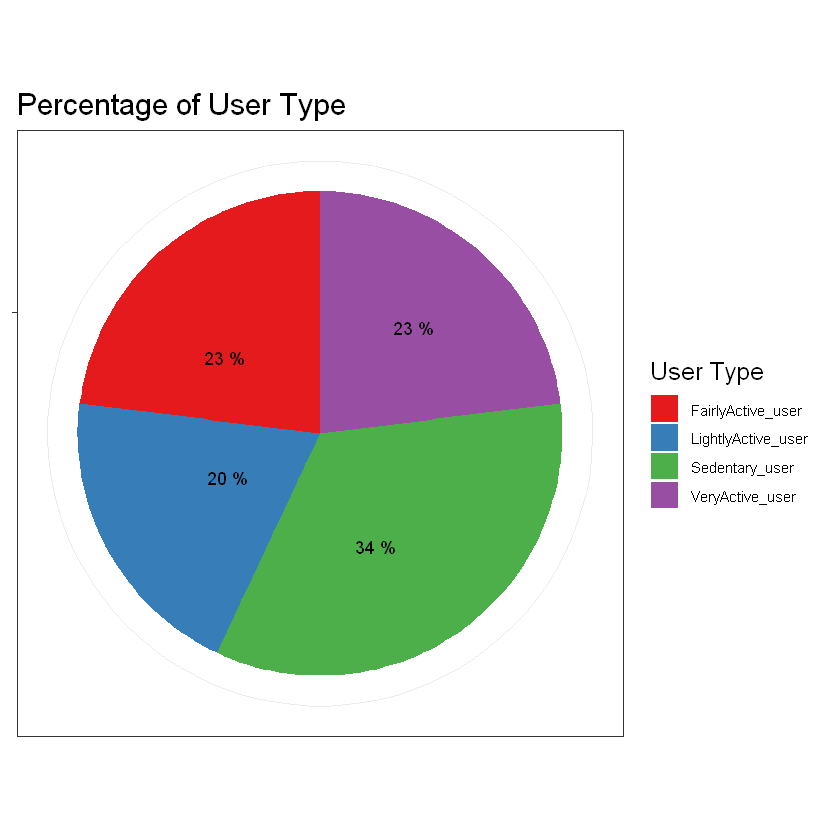

In [15]:
suppressMessages({
#Create a table with user id and its user type    
categories=list2[[12]]%>%
    group_by(Id,Date)%>%
    summarise(Steps=sum(Steps))%>%
    group_by(Id)%>%
    summarise(Steps=round(mean(Steps),0))%>%
    mutate(Category=case_when(
      Steps<5000~"Sedentary_user",
      Steps>=5000 & Steps<=7499~"LightlyActive_user",
      Steps>=7500 & Steps<=9999~"FairlyActive_user",
      Steps>=10000~"VeryActive_user"
    ))%>%select(-2)
 #Graph to see the distribuition of user type   
    categories%>%
      group_by(Category)%>%
      summarise(count=n())%>%
      mutate(perc=round((count/sum(count))*100,0))%>%
      ggplot(aes("",perc,fill=Category))+
      geom_bar(stat = "identity",width = 1)+
      coord_polar('y')+
      geom_text_repel(aes(label=paste(perc,"%")),position = position_stack(vjust = 0.5))+
      labs(title="Percentage of User Type",y=NULL,x=NULL,fill="User Type")+
      theme_bw()+
      scale_fill_brewer(palette = "Set1")+
      scale_y_continuous(breaks = NULL)+
      theme(title = element_text(size = 15))
    
    })

We can observe from the graph that the proportion of users is quite good as there is a similar quantity between user types, with a slightly higher number of sedentary participants.

#### Second, we analiyze all the variables individually and then we see the correlation between them.
##### We have 5 importants variables: 
* Heartrate
* Calories
* Intensity
* Steps
* Sleep

### <span style="color:#014ba0"> Heartrate </span>

In [16]:
# Visualization of the table
head(list2[[2]],7)

Id,Date,Time,Value
<dbl>,<dttm>,<time>,<dbl>
2022484408,2016-04-01,07:54:00,93
2022484408,2016-04-01,07:54:05,91
2022484408,2016-04-01,07:54:10,96
2022484408,2016-04-01,07:54:15,98
2022484408,2016-04-01,07:54:20,100
2022484408,2016-04-01,07:54:25,101
2022484408,2016-04-01,07:54:30,104


Value is equal to BPM (Beats per Minute) and displays every 5 seconds.

In [17]:
#Order vectors
order_days=c("lunes", "martes", "miércoles", "jueves", "viernes", "sábado", "domingo")
order_time=c("Morning","Afternoon","Evening","Late Evening")
order_levels=c("Sedentary_user","LightlyActive_user","FairlyActive_user","VeryActive_user")

#It helps to order plots

<a id="2"></a>

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


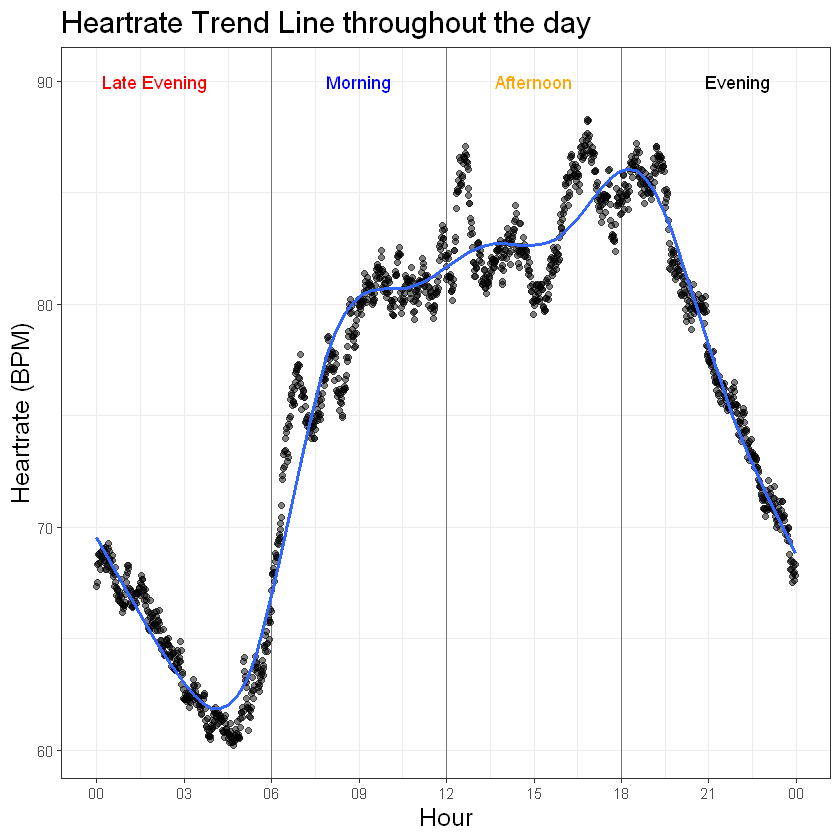

In [18]:
# Graph to see how heartrate variates throughout the day
list2[[2]]%>%
mutate(Time=hms::trunc_hms(Time,60))%>%
group_by(Time)%>%
summarise(Value=mean(Value))%>%
ggplot(aes(Time,Value))+
geom_point(alpha=0.5)+
geom_vline(xintercept=c(hms("06:00:00"),hms("12:00:00"),hms("18:00:00")),alpha=0.5)+
geom_smooth(se=F)+
theme_bw()+
scale_x_time(labels = scales::time_format("%H", tz = "UTC"),breaks = hms(c("00:00:00","03:00:00","06:00:00","09:00:00","12:00:00","15:00:00","18:00:00","21:00:00","24:00:00")))+
labs(title="Heartrate Trend Line throughout the day",y="Heartrate (BPM)",x="Hour")+
annotate("text",x=hms("02:00:00"),y=90,label="Late Evening",col="Red")+
annotate("text",x=hms("09:00:00"),y=90,label="Morning",col="Blue")+
annotate("text",x=hms("15:00:00"),y=90,label="Afternoon",col="Orange")+
annotate("text",x=hms("22:00:00"),y=90,label="Evening",col="Black")+
theme(title = element_text(size = 15))

We observe that during the late evening, the lowest values of heart rate are found, which is normal as most people are sleeping at this time. From around 5-6 in the morning, there is a gradual increase (people waking up and heading to work predominantly), peaking around 18-19 hours, which is when individuals finish work and engage in physical activities. The values then decline during the evening hours.

<a id="5"></a>

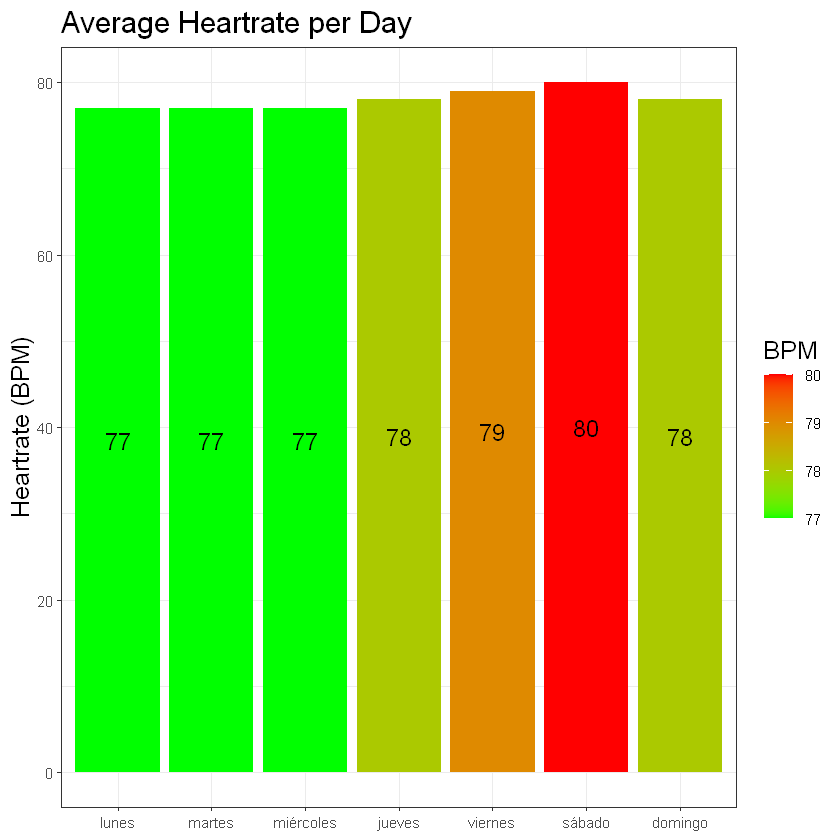

In [19]:
# Graph to see how heartrate variates throughout the week
list2[[2]]%>%
mutate(Weekdays=weekdays(Date))%>%
group_by(Weekdays)%>%
summarise(avg=round(mean(Value),0))%>%
ggplot(aes(factor(Weekdays,levels=order_days),avg))+
geom_bar(stat = "identity",aes(fill=avg))+
geom_text(aes(label=avg),col="black",size=5,position = position_stack(vjust = 0.5))+
labs(title="Average Heartrate per Day",y="Heartrate (BPM)",x=NULL,fill="BPM")+
theme_bw()+
scale_fill_gradient(low = "green", high = "red")+
theme(title = element_text(size = 15))


### <span style="color:#014ba0"> Calories </span>

In [20]:
head(list2[[6]],7)

Id,Date,Time,Calories
<dbl>,<dttm>,<time>,<dbl>
1503960366,2016-03-12,00:00:00,0.7973
1503960366,2016-03-12,00:01:00,0.7973
1503960366,2016-03-12,00:02:00,0.7973
1503960366,2016-03-12,00:03:00,0.7973
1503960366,2016-03-12,00:04:00,0.7973
1503960366,2016-03-12,00:05:00,0.7973
1503960366,2016-03-12,00:06:00,0.7973


<a id="3"></a>

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


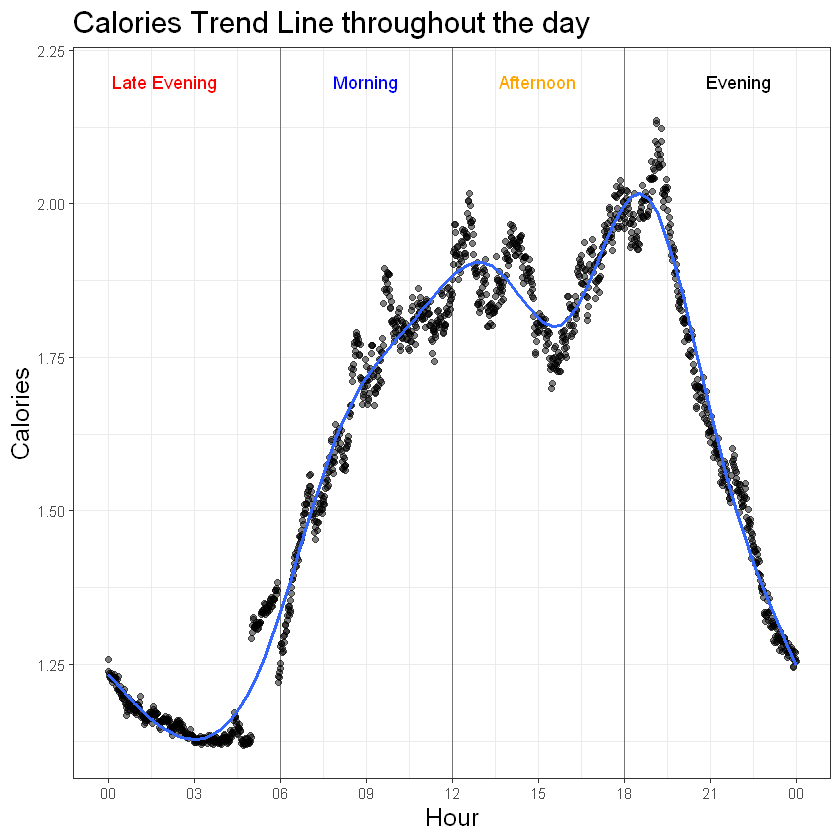

In [21]:
# Graph to see how Calories variate throughout the day
list2[[6]]%>%
group_by(Time)%>%
summarise(Calories=mean(Calories))%>%
ggplot(aes(Time,Calories))+
geom_point(alpha=0.5)+
geom_vline(xintercept=c(hms("06:00:00"),hms("12:00:00"),hms("18:00:00")),alpha=0.5)+
geom_smooth(se=F)+
theme_bw()+
scale_x_time(labels = scales::time_format("%H", tz = "UTC"),breaks = hms(c("00:00:00","03:00:00","06:00:00","09:00:00","12:00:00","15:00:00","18:00:00","21:00:00","24:00:00")))+
labs(title="Calories Trend Line throughout the day",y="Calories",x="Hour")+
annotate("text",x=hms("02:00:00"),y=2.2,label="Late Evening",col="Red")+
annotate("text",x=hms("09:00:00"),y=2.2,label="Morning",col="Blue")+
annotate("text",x=hms("15:00:00"),y=2.2,label="Afternoon",col="Orange")+
annotate("text",x=hms("22:00:00"),y=2.2,label="Evening",col="Black")+
theme(title = element_text(size = 15))

<a id="6"></a>

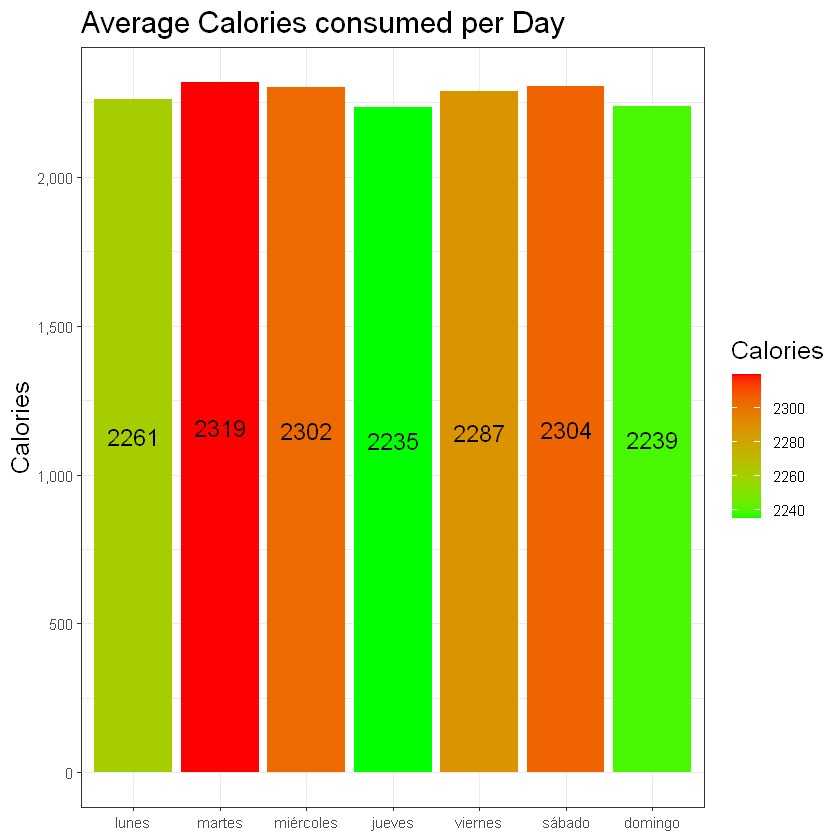

In [22]:
# Graph to see how Calories variate throughout the week
suppressMessages({

list2[[6]]%>%
group_by(Id,Date)%>%
summarise(Calories=sum(Calories))%>%
mutate(Weekdays=weekdays(Date))%>%
group_by(Weekdays)%>%
summarise(Calories=round(mean(Calories),0))%>%
ggplot(aes(factor(Weekdays,levels=order_days),Calories))+
geom_bar(stat = "identity",aes(fill=Calories))+
geom_text(aes(label=Calories),col="black",size=5,position = position_stack(vjust = 0.5))+
scale_fill_gradient(low = "green", high = "red")+
labs(title="Average Calories consumed per Day",y="Calories",x=NULL)+
theme_bw()+
scale_y_continuous(labels = comma_format())+
theme(title = element_text(size = 15))
    
    })


### <span style="color:#014ba0"> Steps </span>

In [23]:
head(list2[[12]],7)

Id,Date,Time,Steps
<dbl>,<dttm>,<time>,<dbl>
1503960366,2016-03-12,00:00:00,0
1503960366,2016-03-12,00:01:00,0
1503960366,2016-03-12,00:02:00,0
1503960366,2016-03-12,00:03:00,0
1503960366,2016-03-12,00:04:00,0
1503960366,2016-03-12,00:05:00,0
1503960366,2016-03-12,00:06:00,0


<a id="8"></a>

Average Steps: 7198

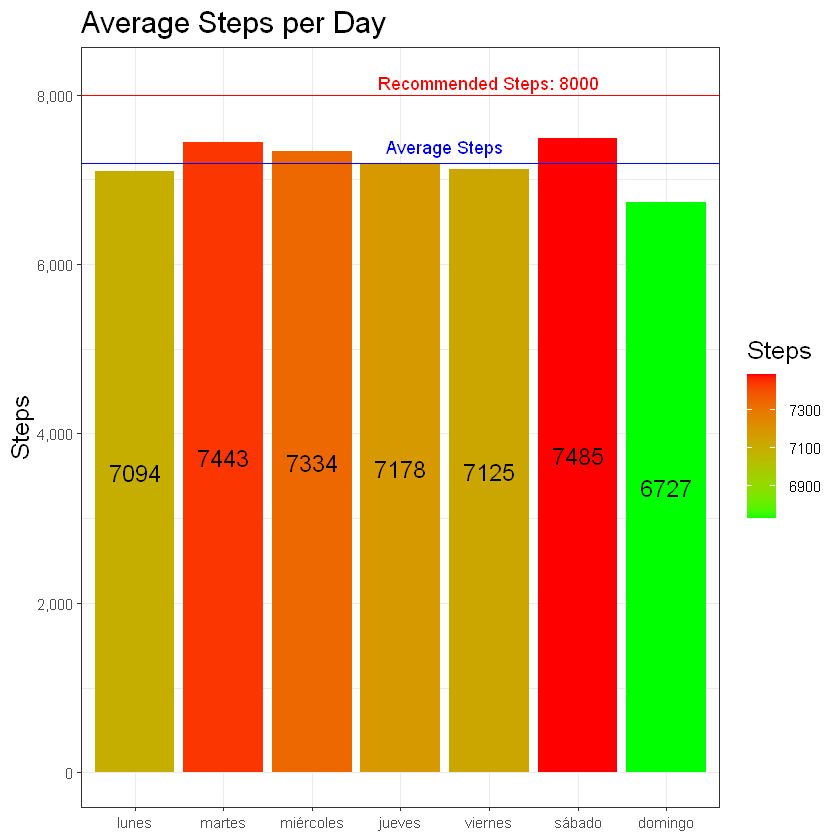

In [24]:
suppressMessages({
# Graph to see how Steps variate throughout the week
a1=list2[[12]]%>%
group_by(Id,Date)%>%
summarise(Steps=sum(Steps))%>%
mutate(Weekdays=weekdays(Date))%>%
group_by(Weekdays)%>%
summarise(Steps=round(mean(Steps),0))    
    
list2[[12]]%>%
group_by(Id,Date)%>%
summarise(Steps=sum(Steps))%>%
mutate(Weekdays=weekdays(Date))%>%
group_by(Weekdays)%>%
summarise(Steps=round(mean(Steps),0))%>%
ggplot(aes(factor(Weekdays,levels=order_days),Steps))+
geom_bar(stat = "identity",aes(fill=Steps))+
geom_hline(yintercept=mean(a1$Steps),col="blue")+
geom_hline(yintercept=8000,col="red")+
labs(title="Average Steps per Day",y="Steps",x=NULL,fill="Steps")+
theme_bw()+
scale_y_continuous(labels = comma_format())+
scale_fill_gradient(low = "green", high = "red")+
geom_text(aes(label=Steps),col="black",size=5,position = position_stack(vjust = 0.5))+
theme(title = element_text(size = 15))+
annotate("text",x="viernes",y=8150,label="Recommended Steps: 8000",col="Red")+
annotate("text",x=4.5,y=7390,label="Average Steps",col="Blue")
    
    })
cat("Average Steps:",mean(a1$Steps))
rm(a1)

Here we observe the average number of steps taken per day, with the global mean being approximately 7200 steps per day. This average is surpassed on Saturdays, Tuesdays, and Wednesdays. The lowest number of steps occurs on Sundays.

### <span style="color:#014ba0"> Intensity </span>

In [25]:
head(list2[[8]],7)

Id,Date,Time,Intensity
<dbl>,<dttm>,<time>,<dbl>
1503960366,2016-03-12,00:00:00,0
1503960366,2016-03-12,00:01:00,0
1503960366,2016-03-12,00:02:00,0
1503960366,2016-03-12,00:03:00,0
1503960366,2016-03-12,00:04:00,0
1503960366,2016-03-12,00:05:00,0
1503960366,2016-03-12,00:06:00,0


* Intensity = 0 (Sedentary)
* Intensity = 1 (Lightly Active)
* Intensity = 2 (Fairly Active)
* Intensity = 3 (Very Active)

<a id="4"></a>

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


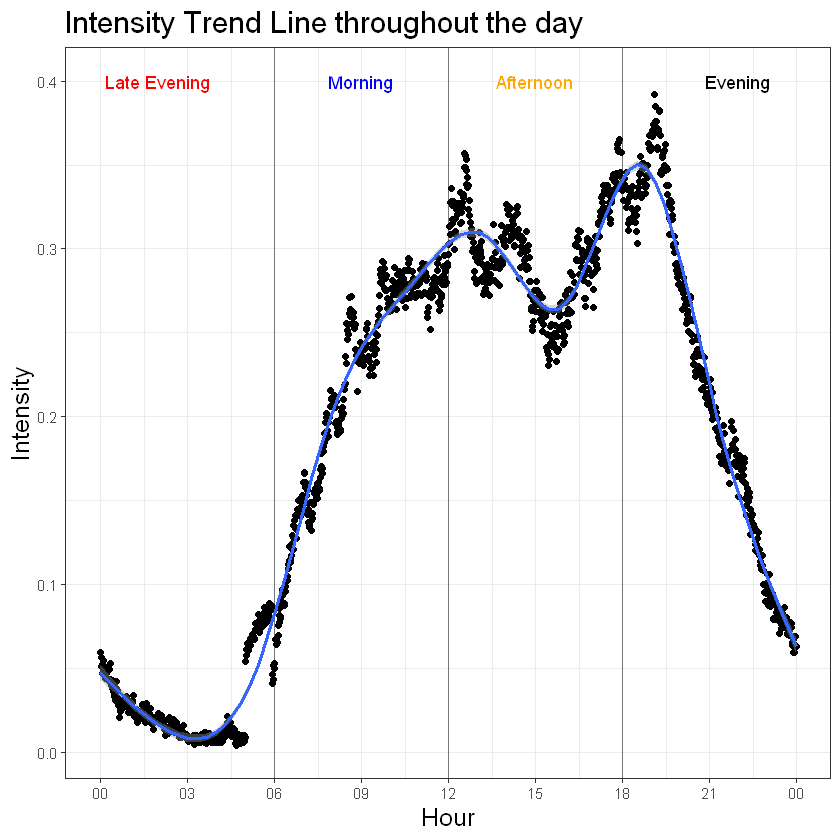

In [26]:
# Graph to see how the intensity variates throughout the day
list2[[8]]%>%
group_by(Time)%>%
summarise(Intensity=mean(Intensity))%>%
ggplot(aes(Time,Intensity))+
geom_point()+
geom_vline(xintercept=c(hms("06:00:00"),hms("12:00:00"),hms("18:00:00")),alpha=0.5)+
geom_smooth()+
labs(title="Intensity Trend Line throughout the day",y="Intensity",x="Hour",fill=NULL)+
theme_bw()+
scale_x_time(labels = scales::time_format("%H", tz = "UTC"),breaks = hms(c("00:00:00","03:00:00","06:00:00","09:00:00","12:00:00","15:00:00","18:00:00","21:00:00","24:00:00")))+
annotate("text",x=hms("02:00:00"),y=0.4,label="Late Evening",col="Red")+
annotate("text",x=hms("09:00:00"),y=0.4,label="Morning",col="Blue")+
annotate("text",x=hms("15:00:00"),y=0.4,label="Afternoon",col="Orange")+
annotate("text",x=hms("22:00:00"),y=0.4,label="Evening",col="Black")+
theme(title = element_text(size = 15))


We observe that during the late evening, the lowest intensity values are found, which is normal as the majority of people are sleeping at this time. From 5-6 in the morning, there is an increase (people waking up and going to work predominantly). Following this, there are two peaks of intensity, primarily due to preferred activity hours on weekdays and weekends (a difference that can be observed in the following graph), with values decreasing later in the evening.

<a id="11"></a>

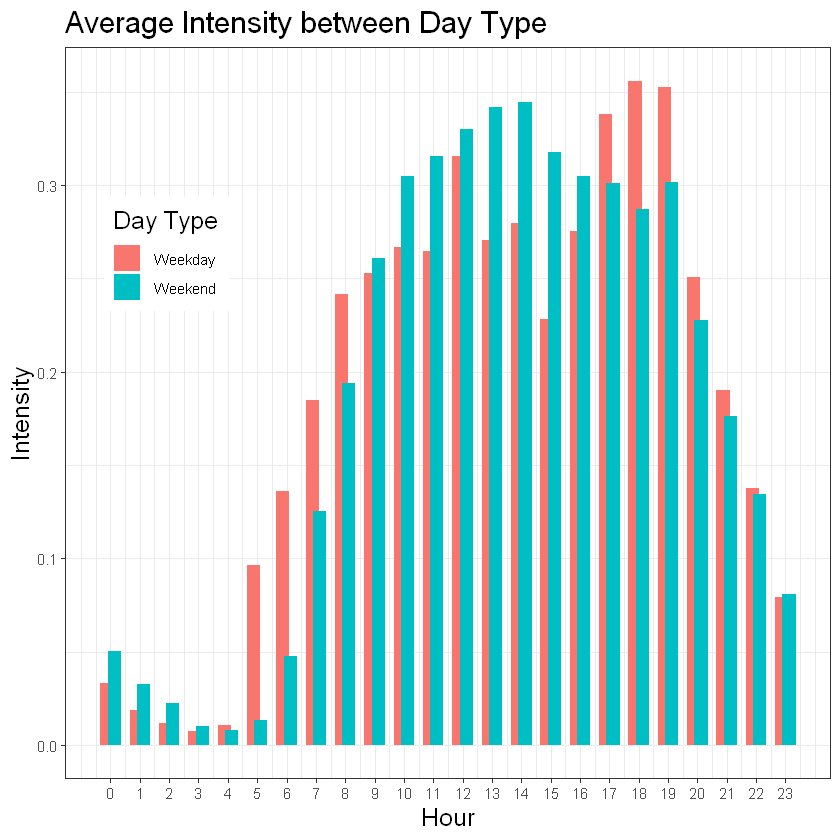

In [27]:
# Graph to see if there is a diference between weekdays and weekends
suppressMessages({
  
  list2[[8]]%>%
    mutate(Hour=hour(Time))%>%
    group_by(Id,Date,Hour)%>%
    summarise(Intensity=sum(Intensity))%>%
    mutate(Weekdays=weekdays(Date),type_day=ifelse(Weekdays%in%c("sábado", "domingo"),"Weekend","Weekday"))%>%
    group_by(type_day,Hour)%>%
    summarise(Intensity=(mean(Intensity))/60)%>%
    ggplot(aes(Hour,Intensity,fill=type_day))+
    geom_bar(stat="identity",position = position_dodge(width = 0.5))+
    labs(title="Average Intensity between Day Type",y="Intensity",x="Hour",fill="Day Type")+
    theme_bw()+
    scale_x_continuous(breaks=c(0:23))+
    theme(title = element_text(size = 15),
          legend.position = c(0.05, 0.95),
          legend.justification = c(0, 2))
  
})


Here, you can clearly observe the two intensity peaks that occur at different times of the day, mainly due to whether it is a weekday or weekend.

<a id="7"></a>

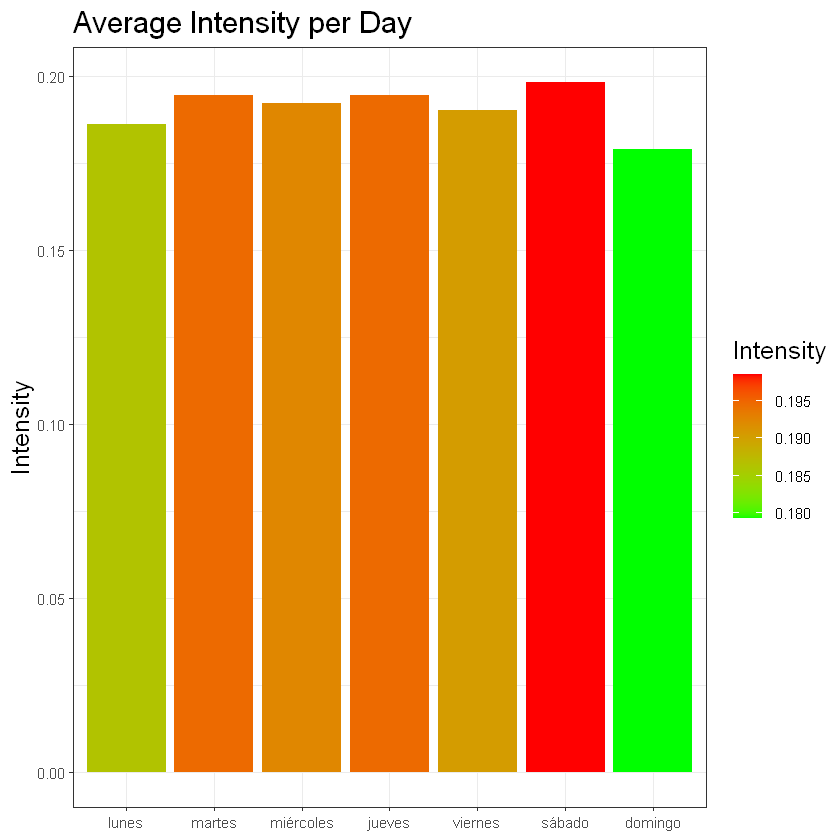

In [28]:
suppressMessages({
# Graph to see how the intensity variates throughout the week
list2[[8]]%>%
mutate(Hour=hour(Time))%>%
group_by(Id,Date,Hour)%>%
summarise(Intensity=sum(Intensity))%>%
mutate(Weekdays=weekdays(Date))%>%
group_by(Weekdays,Hour)%>%
summarise(Intensity=(mean(Intensity))/60)%>%
group_by(Weekdays)%>%
summarise(Intensity=(sum(Intensity)/24))%>%
ggplot(aes(factor(Weekdays,levels=order_days),Intensity))+
geom_bar(stat = "identity",aes(fill=Intensity))+
labs(title="Average Intensity per Day",y="Intensity",x=NULL,fill="Intensity")+
theme_bw()+
scale_fill_gradient(low = "green", high = "red")+
theme(title = element_text(size = 15))
    
    })


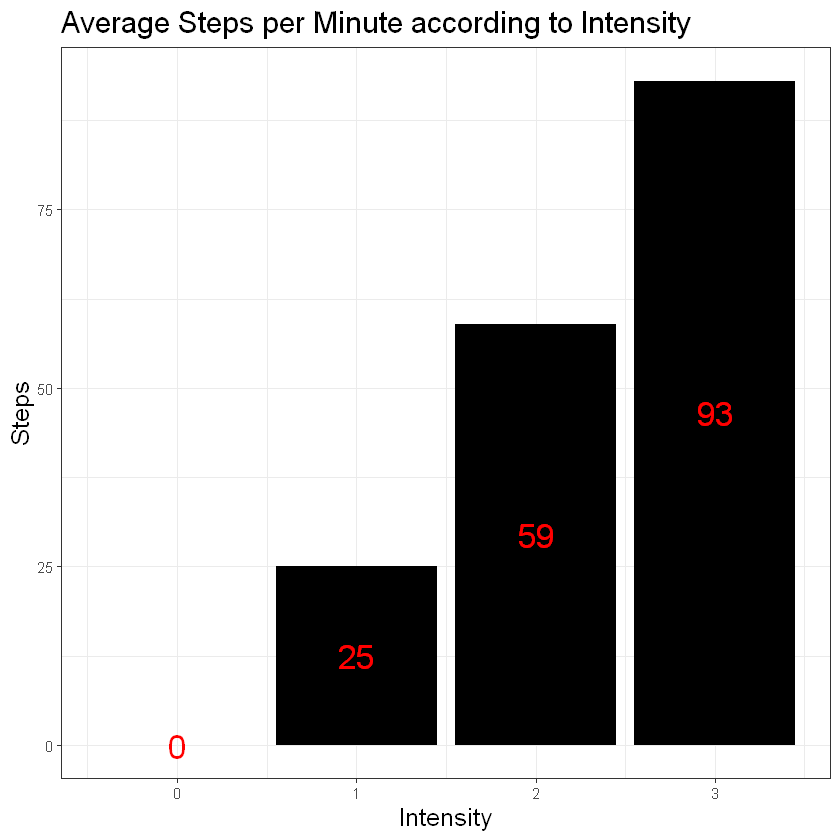

In [29]:
#merge between steps table and intensity table
a1=merge(list2[[8]],list2[[12]], by.x = c("Id","Date","Time"), by.y =c("Id","Date","Time"))
#graph to see the average steps per intensity
a1%>%
group_by(Intensity)%>%
summarise(mean=round(mean(Steps),0))%>%
ggplot(aes(Intensity,mean))+
geom_bar(stat = "identity",fill="black")+
labs(title="Average Steps per Minute according to Intensity",y="Steps",x="Intensity")+
theme_bw()+
geom_text(aes(label=mean),col="red",size=7,position = position_stack(vjust = 0.5))+
theme(title = element_text(size = 15))


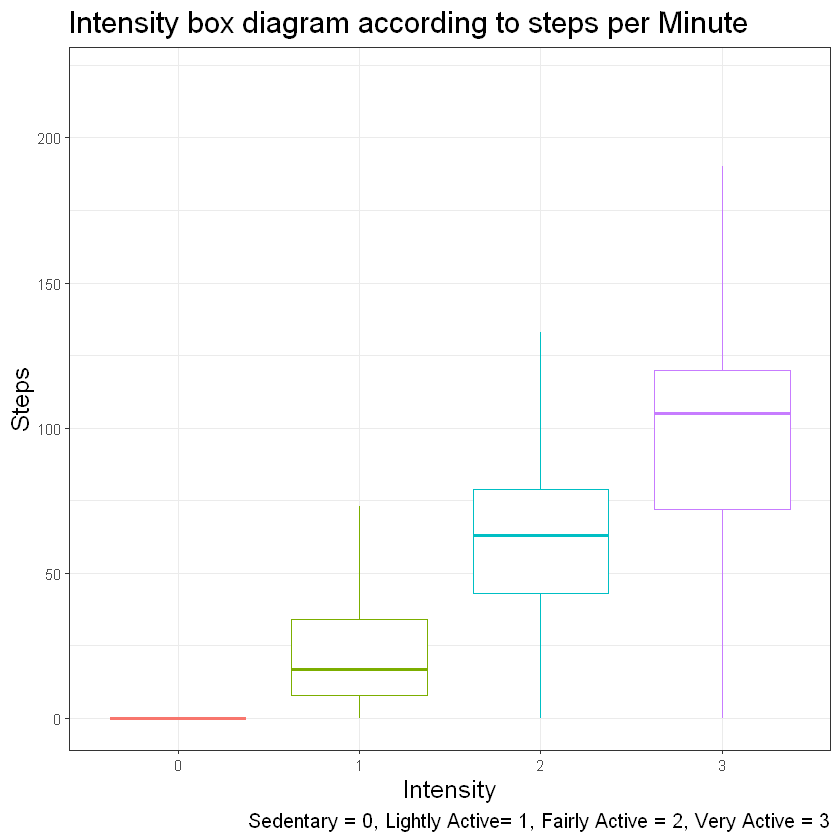

In [30]:
#boxplots
a1%>%
ggplot(aes(x=factor(Intensity),Steps))+
geom_boxplot(aes(col=factor(Intensity)),outlier.shape = NA)+
labs(title="Intensity box diagram according to steps per Minute",y="Steps",x="Intensity",caption = "Sedentary = 0, Lightly Active= 1, Fairly Active = 2, Very Active = 3")+
theme_bw()+
guides(col = "none")+
theme(title = element_text(size = 15))
rm(a1)

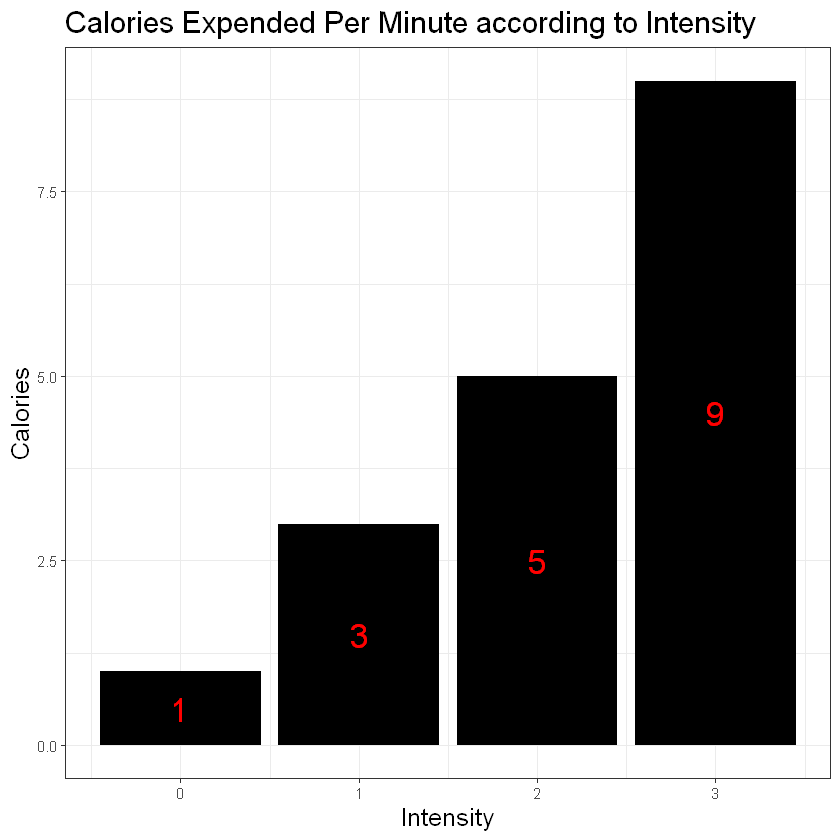

In [31]:
#merge between Calories table and intensity table
a1=merge(list2[[8]],list2[[6]], by.x = c("Id","Date","Time"), by.y =c("Id","Date","Time"))
#graph to see average consumed calories per intensity
a1%>%
group_by(Intensity)%>%
summarise(mean=round(mean(Calories),0))%>%
ggplot(aes(Intensity,mean))+
geom_bar(stat = "identity",fill="black")+
labs(title="Calories Expended Per Minute according to Intensity",y="Calories",x="Intensity")+
theme_bw()+
geom_text(aes(label=mean),col="red",size=7,position = position_stack(vjust = 0.5))+
theme(title = element_text(size = 15))


Warning message:
"The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as of ggplot2 3.3.4."


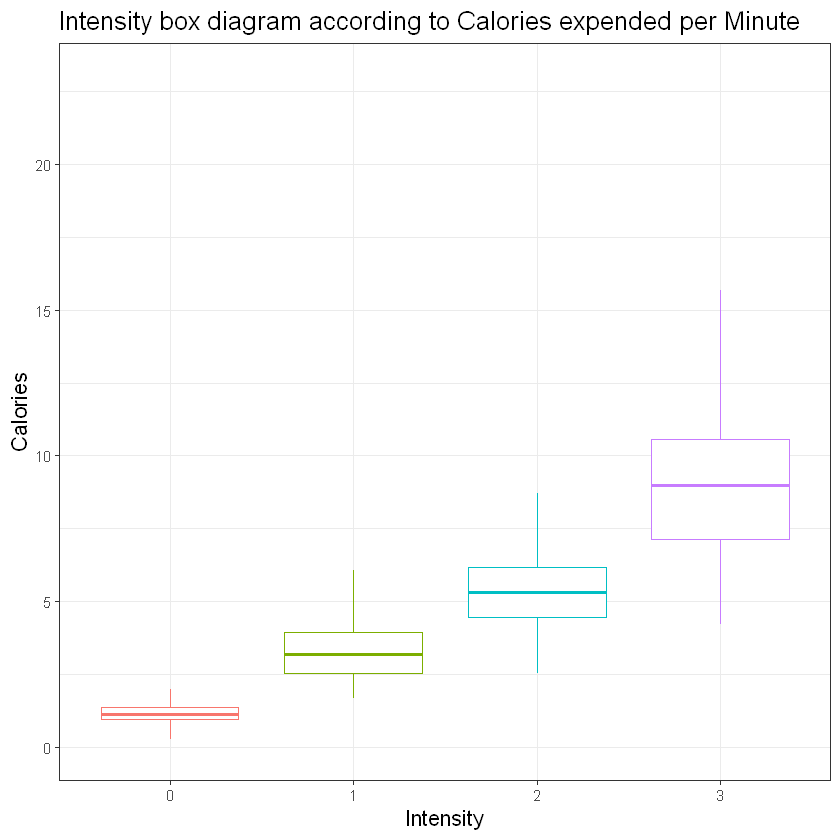

In [32]:
#boxplots
a1%>%
ggplot(aes(x=factor(Intensity),Calories))+
geom_boxplot(aes(col=factor(Intensity)),outlier.shape = NA)+
labs(title="Intensity box diagram according to Calories expended per Minute",y="Calories",x="Intensity")+
theme_bw()+
guides(col = FALSE)+
theme(title = element_text(size = 13))
rm(a1)

<a id="12"></a>

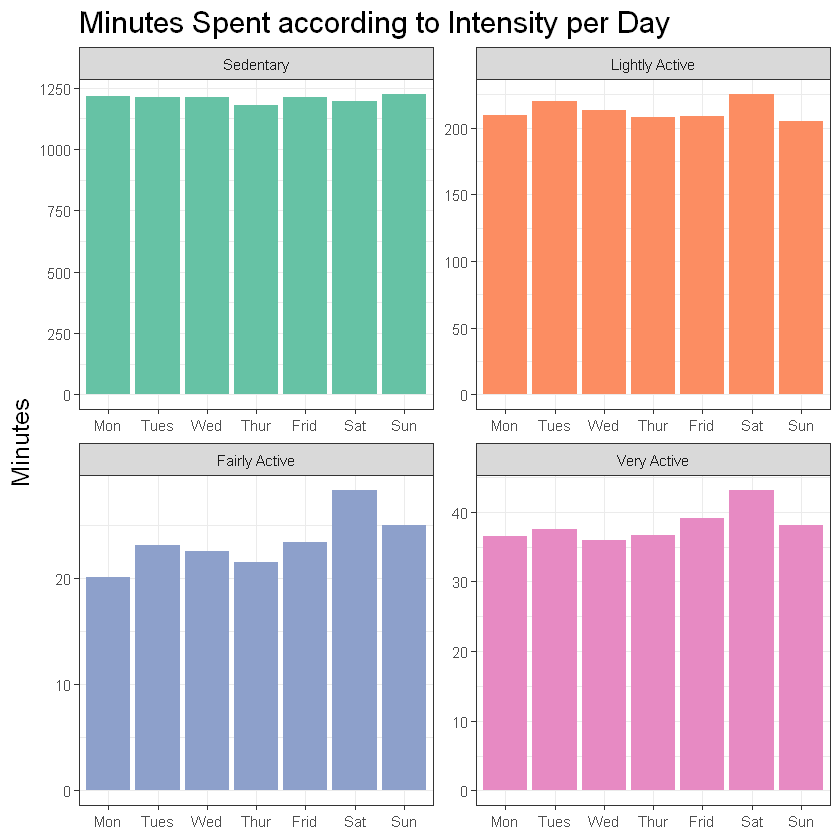

In [33]:
suppressMessages({
#Graph with facets to see the diference of minutes spent between intensities throughout the week
list2[[8]]%>%
group_by(Id,Date,Intensity)%>%
summarise(count=n())%>%
mutate(Weekdays=weekdays(Date))%>%
group_by(Weekdays,Intensity)%>%
summarise(count=mean(count))%>%
ggplot(aes(factor(Weekdays,levels=order_days),count))+
geom_bar(aes(fill=factor(Intensity)),position = "dodge",stat = "identity")+
labs(title="Minutes Spent according to Intensity per Day",y="Minutes",x=NULL,fill="Intensity")+
theme_bw()+
facet_wrap(~factor(Intensity,labels=c("Sedentary","Lightly Active","Fairly Active","Very Active")),scale="free")+
scale_fill_brewer(palette = "Set2")+
guides(fill="none")+
theme(title = element_text(size = 15))+
scale_x_discrete(labels =c("Mon","Tues","Wed","Thur","Frid","Sat","Sun"))
    
    })

In [34]:
suppressMessages({
#create a table that resumes minutes spent per day according to intensity
a1=list2[[8]]%>%
group_by(Id,Date,Intensity)%>%
summarise(count=n())
    
#to filter out those records that do not add up to 1440 minutes that correspond to a day
a1=a1%>%pivot_wider(names_from=Intensity,values_from=count) #long to wide format
a1[is.na(a1)]=0
a1=a1%>%
    mutate(Total=`0`+`1`+`2`+`3`)%>%
    filter(Total==1440)%>%
    select(1:6)%>%
    pivot_longer(cols=3:6,names_to = "Intensity", values_to = "count") #wide to long format
    
    })

In [35]:
head(a1,8)

Id,Date,Intensity,count
<dbl>,<dttm>,<chr>,<int>
1503960366,2016-03-12,0,1056
1503960366,2016-03-12,1,266
1503960366,2016-03-12,2,24
1503960366,2016-03-12,3,94
1503960366,2016-03-13,0,1106
1503960366,2016-03-13,1,216
1503960366,2016-03-13,2,13
1503960366,2016-03-13,3,105


In [36]:
#to calculate average minutes spent per day according to Intensity
a1%>%
group_by(Intensity)%>%
summarise(minutes_mean=round(mean(count),0))

Intensity,minutes_mean
<chr>,<dbl>
0,1219
1,187
2,13
3,20


<a id="13"></a>

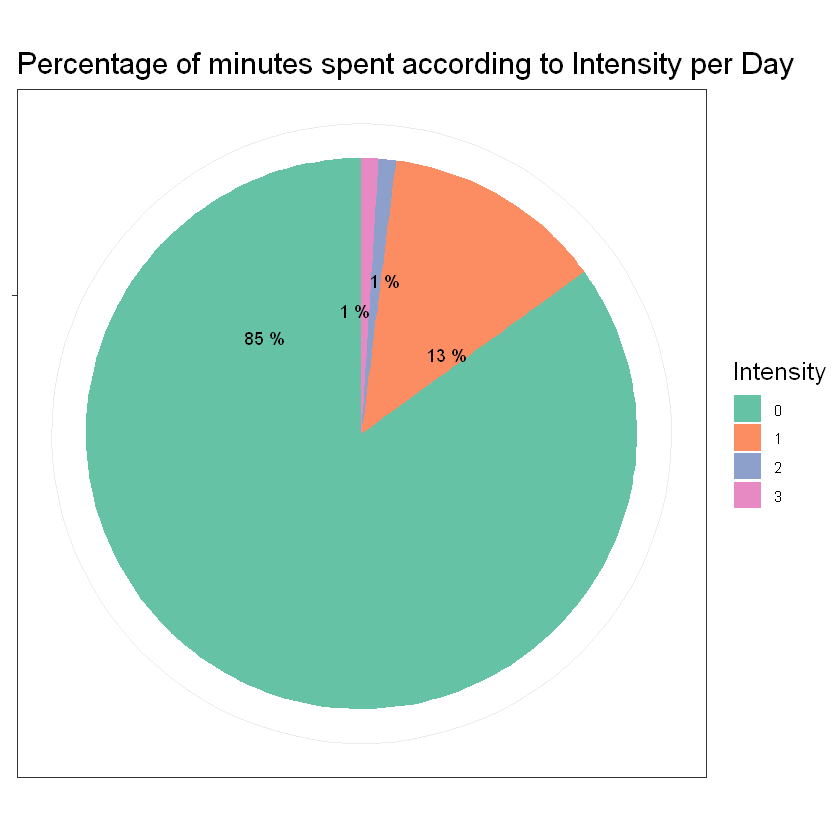

In [37]:
#pie chart to see percentage of minutes spent according to intensity per day
a1%>%
group_by(Intensity)%>%
summarise(count=mean(count))%>%
mutate(percentage=round((count/sum(count))*100,digits=0))%>%
ggplot(aes(x="",percentage))+
geom_bar(stat = "identity",width = 1,aes(fill=factor(Intensity)))+
coord_polar('y')+
geom_text_repel(aes(label=paste(percentage,"%")))+
labs(title="Percentage of minutes spent according to Intensity per Day",y=NULL,x=NULL,fill="Intensity")+
theme_bw()+
scale_fill_brewer(palette = "Set2")+
scale_y_continuous(breaks = NULL)+
theme(title = element_text(size = 15))
rm(a1)

<a id="14"></a>

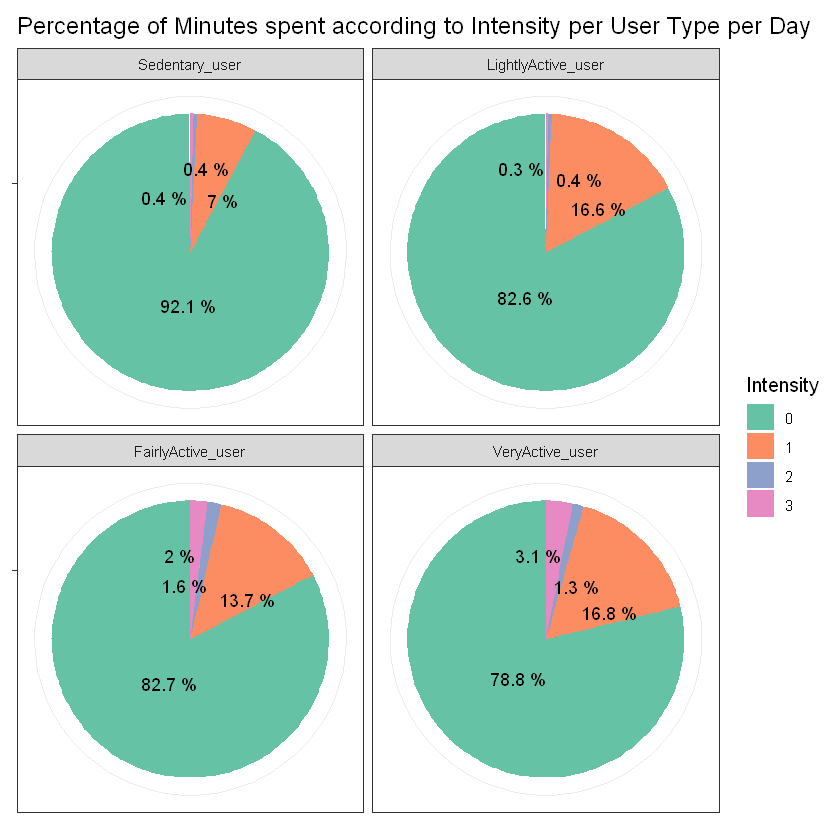

In [38]:
suppressMessages({
#same that before but with facets per user type
a1=list2[[8]]%>%
group_by(Id,Date,Intensity)%>%
summarise(count=n())
            
a1=a1%>%pivot_wider(names_from=Intensity,values_from=count)
a1[is.na(a1)]=0
a1=a1%>%mutate(Total=`0`+`1`+`2`+`3`)
a1=a1%>%filter(Total==1440)
a1=a1%>%select(1:6)
a1=a1%>%pivot_longer(cols=3:6,names_to = "Intensity", values_to = "count")
            
a1=merge(a1,categories,by.x = c("Id"),by.y = c("Id"))
            
a1%>%group_by(Category,Intensity)%>%
summarise(MeanMinutes=mean(count))%>%
mutate(percentage=round((MeanMinutes/1440)*100,1))%>%
ggplot(aes("",percentage,fill=Intensity))+
geom_bar(stat = "identity",width = 1)+
facet_wrap(~factor(Category,levels = order_levels))+
coord_polar('y')+
theme_bw()+
scale_fill_brewer(palette = "Set2")+
scale_y_continuous(breaks = NULL)+
geom_text_repel(aes(label=paste(percentage,"%")),position = position_stack(vjust = 0.5))+
labs(title="Percentage of Minutes spent according to Intensity per User Type per Day",y=NULL,x=NULL,fill="Intensity")+
theme(title = element_text(size = 12))
    
    })

It is evident how the more active users differ from the sedentary ones. In participants labeled as sedentary, approximately 92% of their time is spent in sedentary activities, whereas the other users spend about 10% more of their day engaging in some form of physical activity.

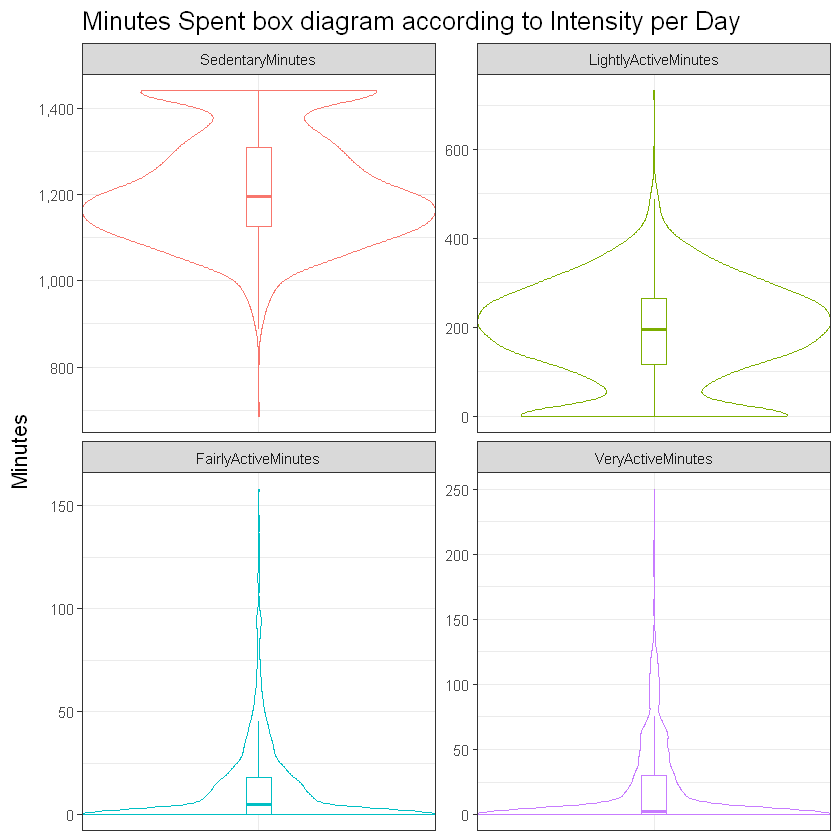

In [39]:
#boxplots
a1%>%
ggplot(aes(factor(Intensity),count))+
geom_violin(aes(col=factor(Intensity)),width=1.4)+
geom_boxplot(aes(col=factor(Intensity)),width=0.1,outlier.shape = NA)+
labs(title="Minutes Spent box diagram according to Intensity per Day",y="Minutes",x=NULL,col=NULL)+
theme_bw()+
facet_wrap(~factor(Intensity,labels = c("SedentaryMinutes","LightlyActiveMinutes","FairlyActiveMinutes","VeryActiveMinutes")),scale="free")+
scale_fill_brewer(palette = "Set2")+
guides(x=FALSE,col="none")+
scale_y_continuous(labels = comma_format())+
theme(title = element_text(size = 13))
rm(a1)

Violin plot alongside the box plot to visualize the distribution of data concerning the minutes spent based on activity, showing a clear predominance in lower activity levels.

#### Down here we can see how the variables are related

<a id="9"></a>

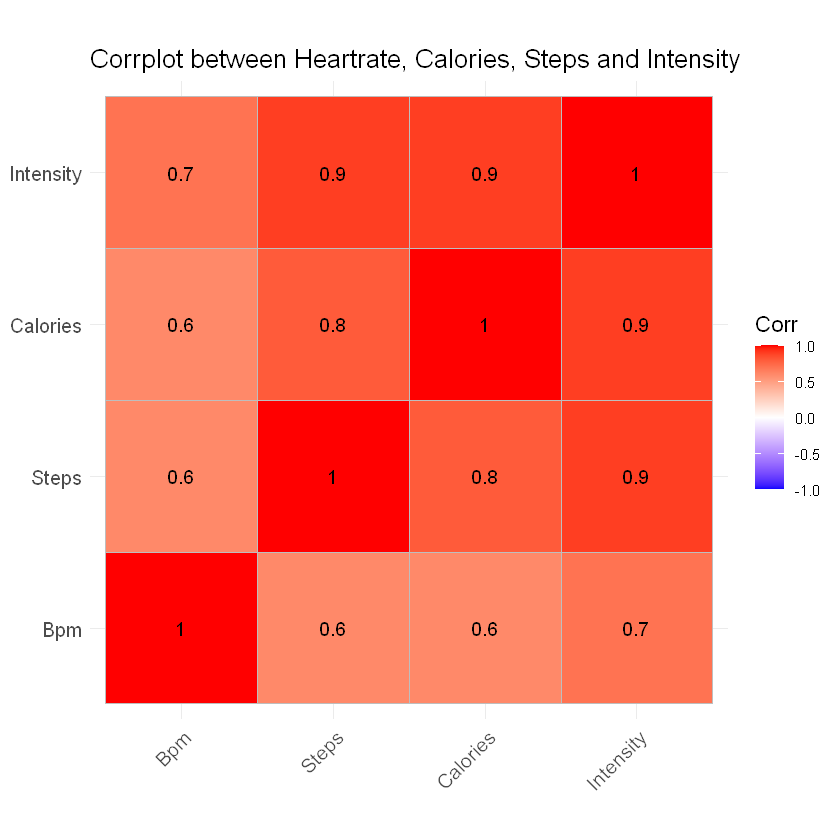

In [40]:
suppressMessages({
#merge between heartrate table and calories table
a2=merge(list2[[2]],list2[[6]], by.x = c("Id","Date","Time"), by.y =c("Id","Date","Time")) 
#merge between the previous table and intensity table
a2=merge(a2,list2[[8]], by.x = c("Id","Date","Time"), by.y =c("Id","Date","Time"))
#merge between the previous table and steps table
a2=merge(a2,list2[[12]], by.x = c("Id","Date","Time"), by.y =c("Id","Date","Time"))
#summary per hour of bpm, calories,intensity and steps.
a2=a2%>%mutate(Hour=hour(Time))%>%
group_by(Id,Date,Hour)%>%
summarise(Bpm=mean(Value),Calories=sum(Calories),Intensity=round((sum(Intensity)/60),2),Steps=sum(Steps))
#Corrplot
b1=round(cor(a2[,c(4:7)]),1)
ggcorrplot(b1,lab = T,hc.order = T)+ggtitle("Corrplot between Heartrate, Calories, Steps and Intensity")+
theme(title = element_text(size = 13))
    
    })
rm(b1)

<a id="10"></a>

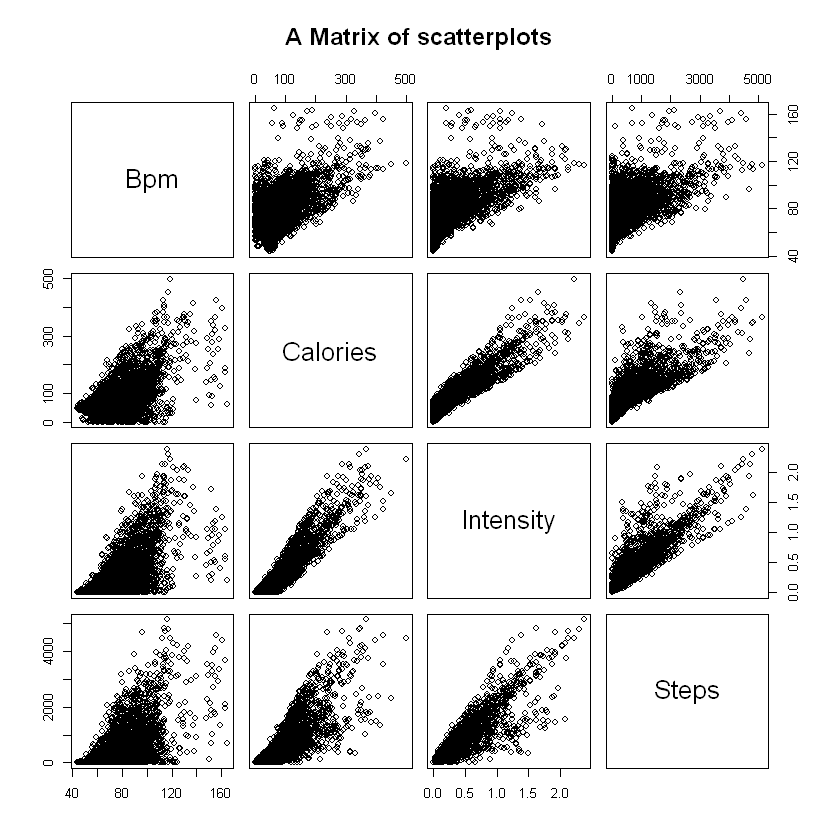

In [41]:
pairs(a2[c(4:7)],main="A Matrix of scatterplots")
rm(a2)

### <span style="color:#014ba0"> Sleep </span>

In [42]:
head(list2[[11]],7)

Id,Date,Time,Value
<dbl>,<dttm>,<time>,<dbl>
1503960366,2016-03-13,02:39:30,1
1503960366,2016-03-13,02:40:30,1
1503960366,2016-03-13,02:41:30,1
1503960366,2016-03-13,02:42:30,1
1503960366,2016-03-13,02:43:30,1
1503960366,2016-03-13,02:44:30,1
1503960366,2016-03-13,02:45:30,2


The 'value' column represents the user's status in bed.
* Value = 1 (Asleep)
* Value = 2 (Restless)
* Value = 3 (Awake)

<a id="15"></a>

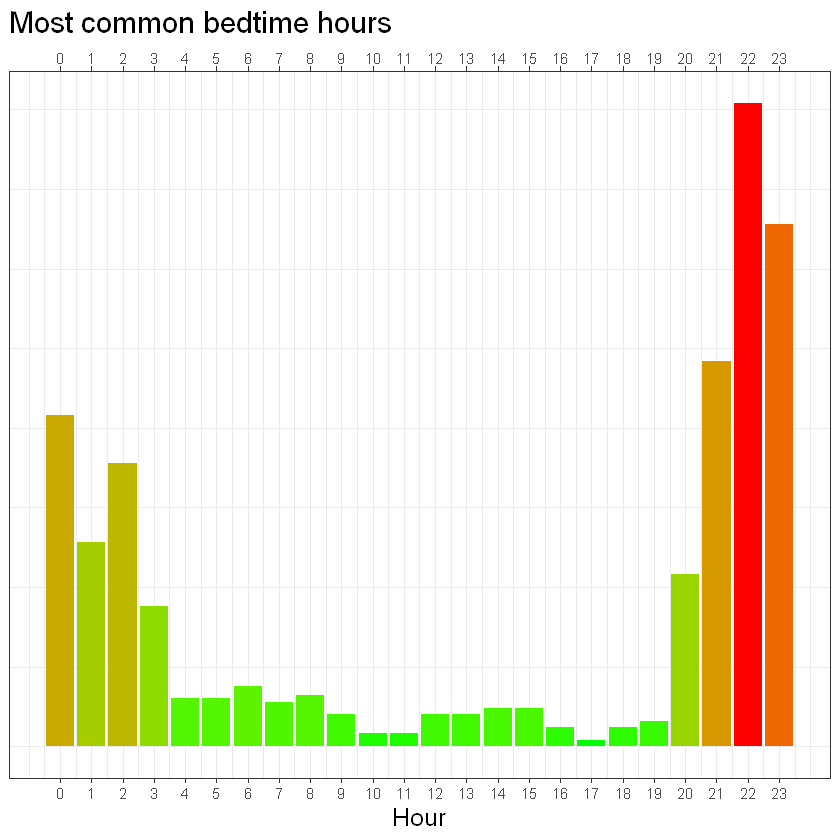

In [43]:
suppressMessages({

a1=list2[[11]]%>%
mutate(MinutesDifference = difftime(Time, lag(Time, default = first(Time)), units = "mins"))

a1=a1%>%mutate(conteo=ifelse(MinutesDifference==1 | MinutesDifference==0,0,1))

a1=a1%>%
filter(MinutesDifference!=-1439)%>%#The use of the filter with 1439 is because, in R, when transitioning from 23:59:00 to 00:00:00, it doesn't represent 1 minute but rather 1 day (1439 minutes)
mutate(Hour=hour(Time))%>%
group_by(Id,Date,Hour)%>%
summarise(TotalSleepRecords=sum(conteo==1))%>%
group_by(Hour)%>%
summarise(TotalSleepRecords=sum(TotalSleepRecords))

a1%>%
ggplot(aes(Hour,TotalSleepRecords))+
geom_bar(stat = "identity",aes(fill=TotalSleepRecords))+
labs(title="Most common bedtime hours",y=NULL,x="Hour")+
theme_bw()+
scale_x_continuous(breaks=c(0:23),sec.axis = sec_axis(
      ~.,
      name = NULL,
      breaks = seq(0, 23, by = 1),
      labels = seq(0, 23, by = 1)
    ))+
guides(y=FALSE,fill=F)+
scale_fill_gradient(low = "green", high = "red")+
theme(title = element_text(size = 15))
    
    }) 
rm(a1)

<a id="16"></a>

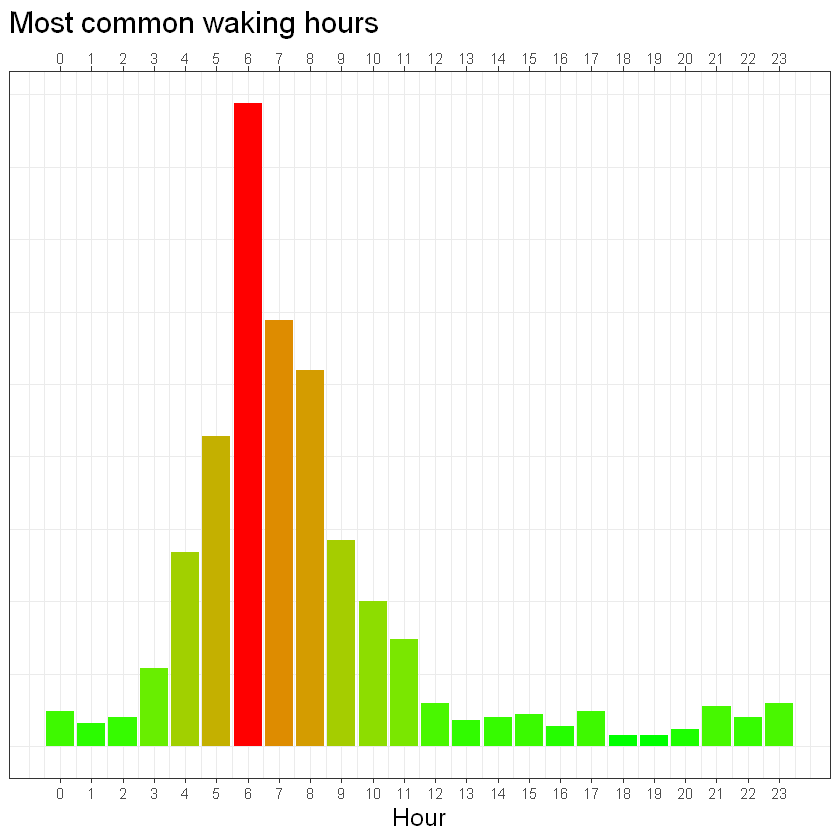

In [44]:
suppressMessages({

a1=list2[[11]]%>%
mutate(MinutesDifference = difftime(lead(Time, default = last(Time)), Time, units = "mins"))

a1=a1%>%mutate(conteo=ifelse(MinutesDifference==1 | MinutesDifference==0,0,1))

a1=a1%>%
filter(MinutesDifference!=-1439)%>%
mutate(Hour=hour(Time))%>%
group_by(Id,Date,Hour)%>%
summarise(TotalSleepRecords=sum(conteo==1))%>%
group_by(Hour)%>%
summarise(TotalSleepRecords=sum(TotalSleepRecords))

a1%>%
ggplot(aes(Hour,TotalSleepRecords))+
geom_bar(stat = "identity",aes(fill=TotalSleepRecords))+
labs(title="Most common waking hours",y=NULL,x="Hour")+
theme_bw()+
scale_x_continuous(breaks=c(0:23),sec.axis = sec_axis(
      ~.,
      name = NULL,
      breaks = seq(0, 23, by = 1),
      labels = seq(0, 23, by = 1)
    ))+
guides(y=FALSE,fill=F)+
scale_fill_gradient(low = "green", high = "red")+
theme(title = element_text(size = 15))
    
    })
rm(a1)

<a id="17"></a>

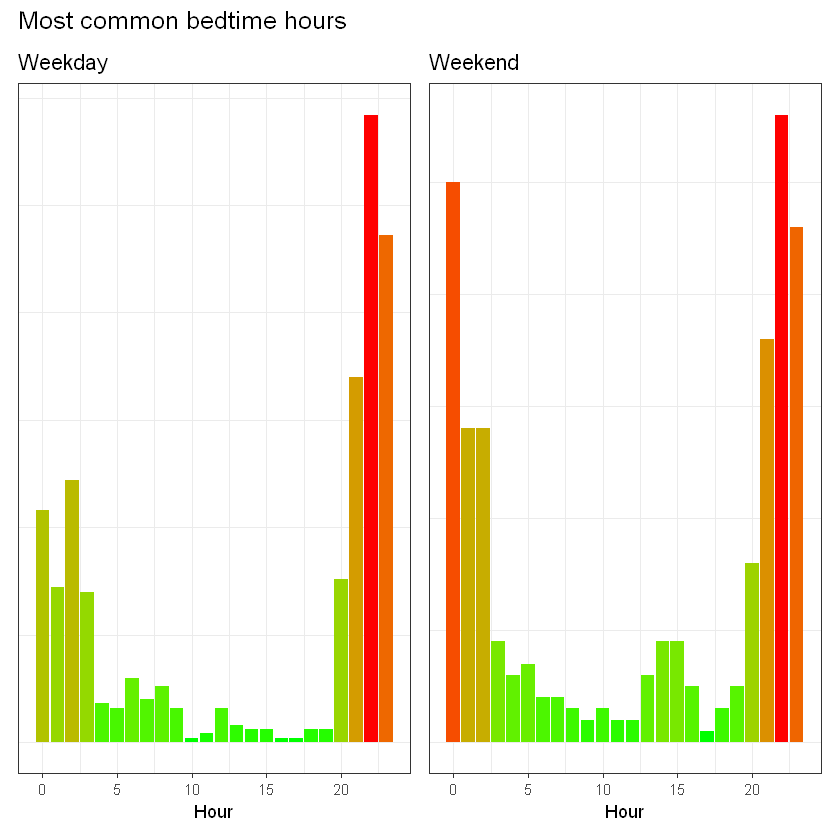

In [57]:
suppressMessages({

a1=list2[[11]]%>%mutate(MinutesDifference = difftime(Time, lag(Time, default = first(Time)), units = "mins"))

a1=a1%>%mutate(conteo=ifelse(MinutesDifference==1 | MinutesDifference==0,0,1))

a1=a1%>%
filter(MinutesDifference!=-1439)%>%
mutate(Hour=hour(Time))%>%
group_by(Id,Date,Hour)%>%
summarise(TotalSleepRecords=sum(conteo==1))%>%
mutate(Weekdays=weekdays(Date),type_day=ifelse(Weekdays%in%c("sábado", "domingo"),"Weekend","Weekday"))%>%
group_by(type_day,Hour)%>%
summarise(TotalSleepRecords=sum(TotalSleepRecords))

a1=a1%>%filter(type_day=="Weekday")

p1=a1%>%
ggplot(aes(Hour,TotalSleepRecords))+
geom_bar(stat = "identity",aes(fill=TotalSleepRecords))+
labs(title="Weekday",y=NULL,x="Hour")+
theme_bw()+
guides(y=FALSE,fill=F)+
scale_fill_gradient(low = "green", high = "red")

a1=list2[[11]]%>%mutate(MinutesDifference = difftime(Time, lag(Time, default = first(Time)), units = "mins"))

a1=a1%>%mutate(conteo=ifelse(MinutesDifference==1 | MinutesDifference==0,0,1))

a1=a1%>%
filter(MinutesDifference!=-1439)%>%
mutate(Hour=hour(Time))%>%
group_by(Id,Date,Hour)%>%
summarise(TotalSleepRecords=sum(conteo==1))%>%
mutate(Weekdays=weekdays(Date),type_day=ifelse(Weekdays%in%c("sábado", "domingo"),"Weekend","Weekday"))%>%
group_by(type_day,Hour)%>%
summarise(TotalSleepRecords=sum(TotalSleepRecords))

a1=a1%>%filter(type_day=="Weekend")

p2=a1%>%
ggplot(aes(Hour,TotalSleepRecords))+
geom_bar(stat = "identity",aes(fill=TotalSleepRecords))+
labs(title="Weekend",y=NULL,x="Hour")+
theme_bw()+
guides(y=FALSE,fill=F)+
scale_fill_gradient(low = "green", high = "red")

p1+p2+
plot_annotation(title = "Most common bedtime hours",theme = theme(plot.title = element_text(size = 15)))
    
    })
rm(a1,p1,p2)

<a id="18"></a>

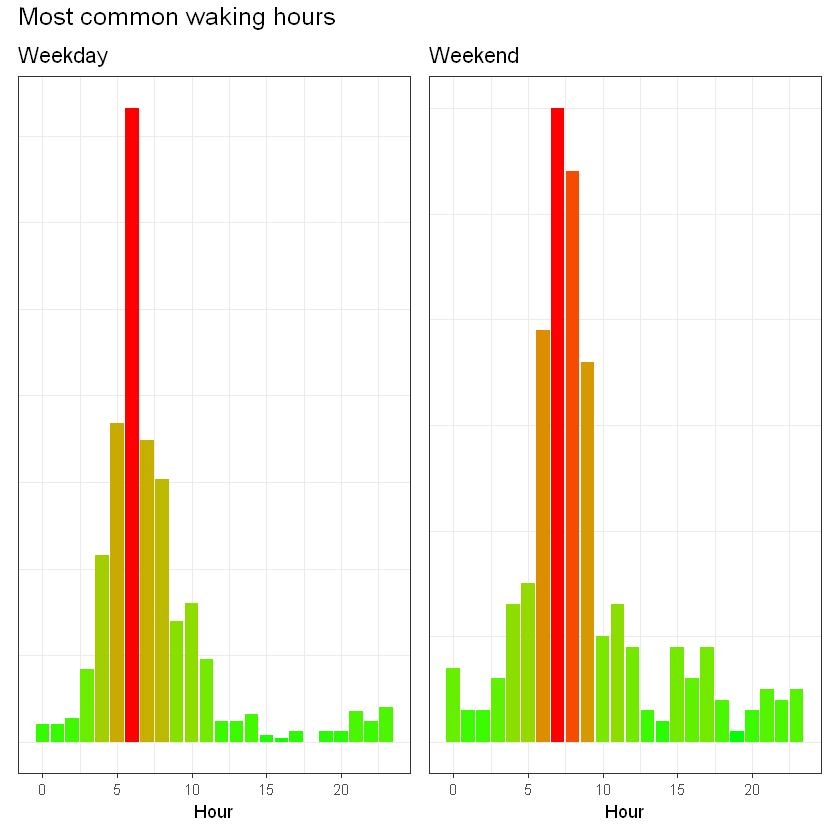

In [58]:
suppressMessages({

a1=list2[[11]]%>%mutate(MinutesDifference = difftime(lead(Time, default = last(Time)), Time, units = "mins"))

a1=a1%>%mutate(conteo=ifelse(MinutesDifference==1 | MinutesDifference==0,0,1))

a1=a1%>%
filter(MinutesDifference!=-1439)%>%
mutate(Hour=hour(Time))%>%
group_by(Id,Date,Hour)%>%
summarise(TotalSleepRecords=sum(conteo==1))%>%
mutate(Weekdays=weekdays(Date),type_day=ifelse(Weekdays%in%c("sábado", "domingo"),"Weekend","Weekday"))%>%
group_by(type_day,Hour)%>%
summarise(TotalSleepRecords=sum(TotalSleepRecords))

a1=a1%>%filter(type_day=="Weekday")

p1=a1%>%
ggplot(aes(Hour,TotalSleepRecords))+
geom_bar(stat = "identity",aes(fill=TotalSleepRecords))+
labs(title="Weekday",y=NULL,x="Hour")+
theme_bw()+
guides(y=FALSE,fill=F)+
scale_fill_gradient(low = "green", high = "red")

a1=list2[[11]]%>%mutate(MinutesDifference = difftime(lead(Time, default = last(Time)), Time, units = "mins"))

a1=a1%>%mutate(conteo=ifelse(MinutesDifference==1 | MinutesDifference==0,0,1))

a1=a1%>%
filter(MinutesDifference!=-1439)%>%
mutate(Hour=hour(Time))%>%
group_by(Id,Date,Hour)%>%
summarise(TotalSleepRecords=sum(conteo==1))%>%
mutate(Weekdays=weekdays(Date),type_day=ifelse(Weekdays%in%c("sábado", "domingo"),"Weekend","Weekday"))%>%
group_by(type_day,Hour)%>%
summarise(TotalSleepRecords=sum(TotalSleepRecords))

a1=a1%>%filter(type_day=="Weekend")

p2=a1%>%
ggplot(aes(Hour,TotalSleepRecords))+
geom_bar(stat = "identity",aes(fill=TotalSleepRecords))+
labs(title="Weekend",y=NULL,x="Hour")+
theme_bw()+
guides(y=FALSE,fill=F)+
scale_fill_gradient(low = "green", high = "red")

p1+p2+
plot_annotation(title = "Most common waking hours",,theme = theme(plot.title = element_text(size = 15)))
    
    })
      
rm(a1,p1,p2)

<a id="19"></a>

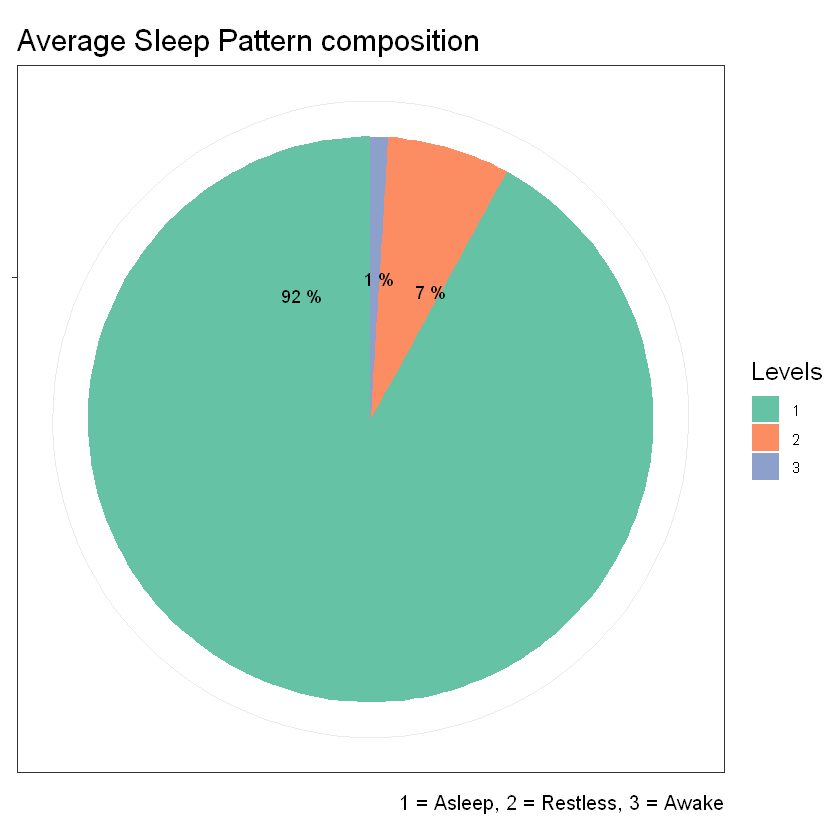

In [47]:
list2[[11]]%>%
group_by(Value)%>%
summarise(count=n())%>%
mutate(percentage=round((count/sum(count))*100,0))%>%
ggplot(aes(x="",percentage))+
geom_bar(stat = "identity",width = 1,aes(fill=factor(Value)))+
coord_polar('y')+
geom_text(aes(label=paste(percentage,"%")))+
labs(title="Average Sleep Pattern composition",y=NULL,x=NULL,fill="Levels",caption="1 = Asleep, 2 = Restless, 3 = Awake")+
theme_bw()+
scale_fill_brewer(palette = "Set2")+
scale_y_continuous(breaks = NULL)+
theme(title = element_text(size = 15))

<a id="20"></a>

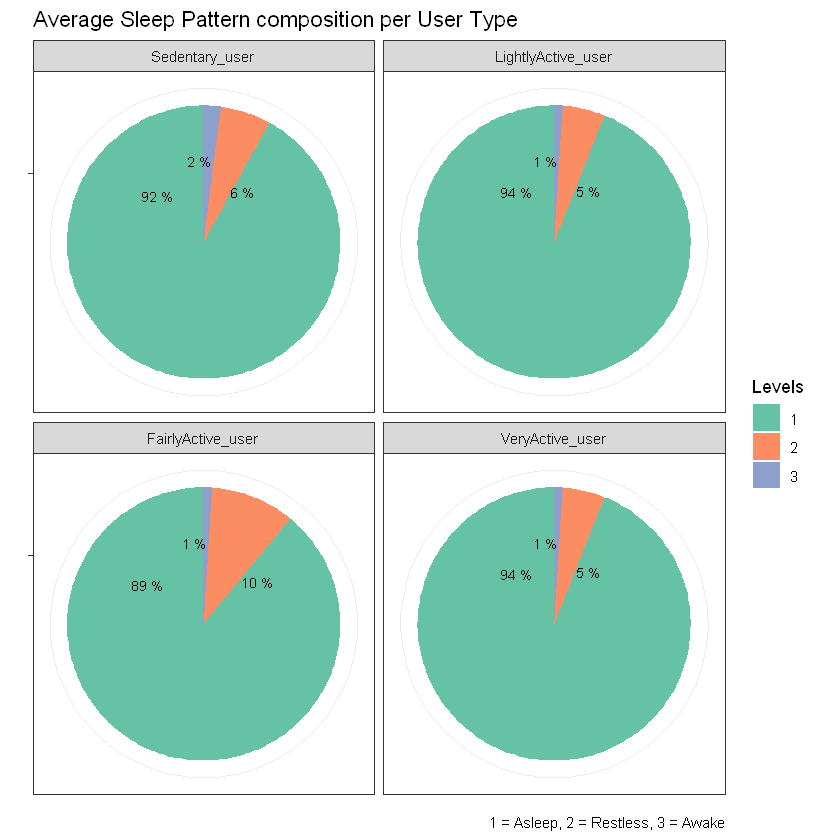

In [48]:
suppressMessages({

a1=merge(list2[[11]],categories,by.x = c("Id"),by.y = c("Id"))

a1%>%
  group_by(Id,Category,Date,Value)%>%
  summarise(count=n())%>%
  group_by(Category,Value)%>%
  summarise(count=mean(count))%>%
  mutate(percentage=round((count/sum(count))*100,0))%>%
  ggplot(aes(x="",percentage))+
  geom_bar(stat = "identity",width = 1,aes(fill=factor(Value)))+
  coord_polar('y')+
  facet_wrap(~factor(Category,levels = order_levels))+
  geom_text_repel(aes(label=paste(percentage,"%")),size=3)+
  labs(title="Average Sleep Pattern composition per User Type",y=NULL,x=NULL,fill="Levels",caption="1 = Asleep, 2 = Restless, 3 = Awake")+
  theme_bw()+
  scale_fill_brewer(palette = "Set2")+
  scale_y_continuous(breaks = NULL)
    
    })
rm(a1)

From here, clear conclusions cannot be drawn regarding the relationship between sleep patterns and the user's activity level. Initially, one might intuitively suggest that individuals engaging in more activity tend to have deeper sleep due to the associated fatigue, but this is not evident in the graphs. With a larger dataset and more participants, the results may vary.

<a id="21"></a>

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


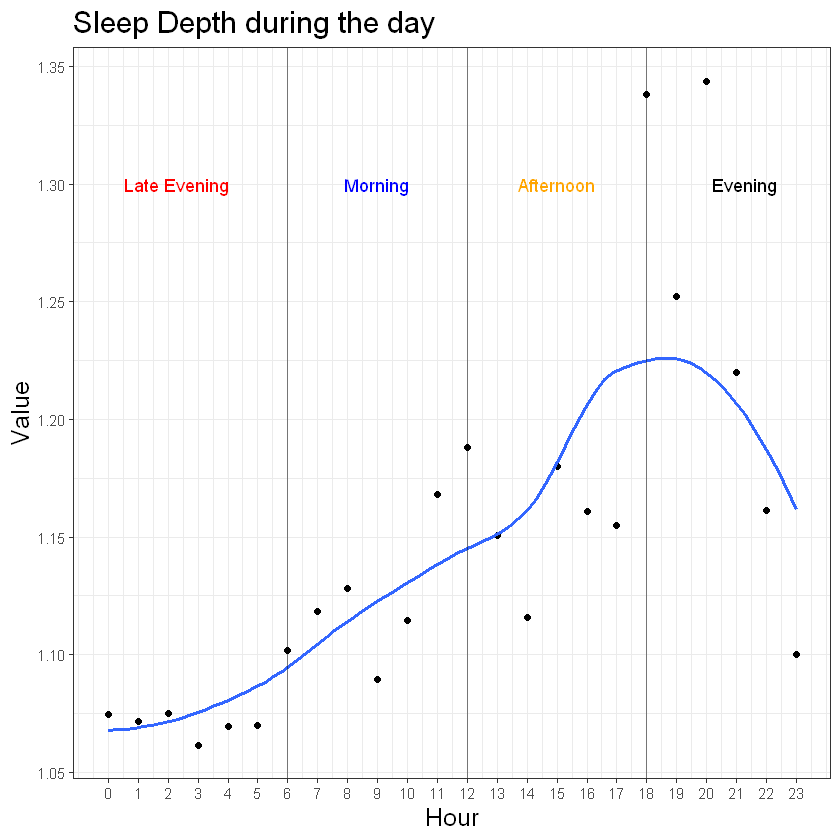

In [49]:
list2[[11]]%>%
mutate(Hour=hour(Time))%>%
group_by(Hour)%>%
summarise(mean=mean(Value))%>%
ggplot(aes(Hour,mean))+
geom_point()+
geom_smooth(se=F)+
labs(title="Sleep Depth during the day",y="Value",x="Hour")+
theme_bw()+
scale_x_continuous(breaks=c(0:23))+
theme(title = element_text(size = 15))+
geom_vline(xintercept=c(6,12,18),alpha=0.5)+
annotate("text",x=2.3,y=1.3,label="Late Evening",col="Red")+
annotate("text",x=9,y=1.3,label="Morning",col="Blue")+
annotate("text",x=15,y=1.3,label="Afternoon",col="Orange")+
annotate("text",x=21.3,y=1.3,label="Evening",col="Black")


This shows how the sleep stage is throughout the day. A high 'value' indicates that dreams during those hours are less deep, while a low 'value' represents deep sleep, and the person does not wake up or isn´t restless during those hours.

<a id="22"></a>

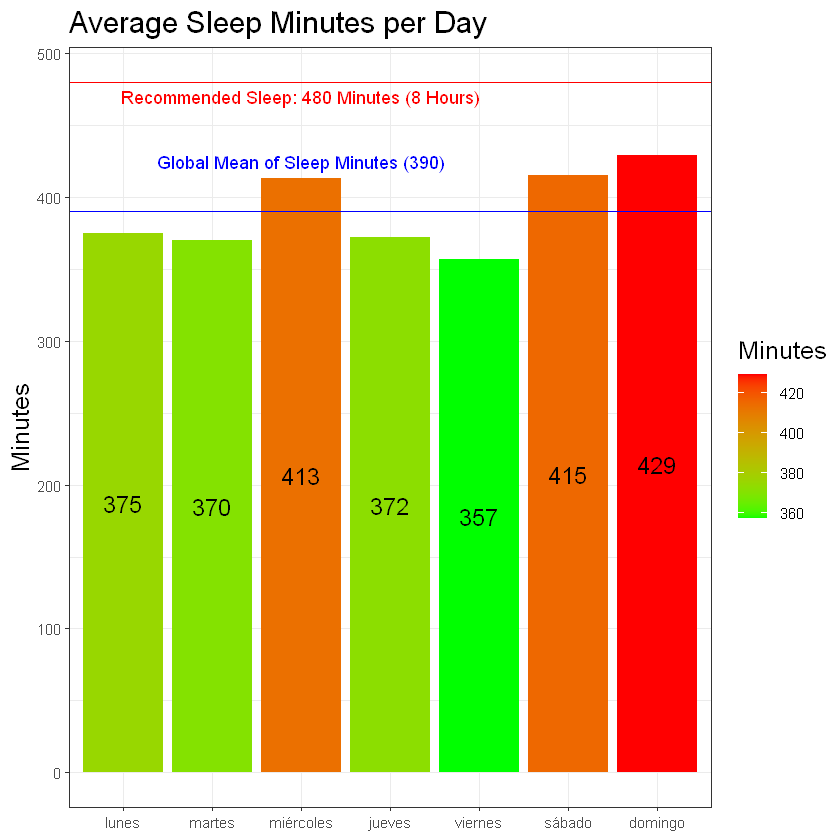

In [60]:
suppressMessages({

a1=list2[[11]]%>%
group_by(Id,Date)%>%
summarise(TotalMinutesAsleep=sum(Value==1),TotalTimeInBed=n())%>%
mutate(TotalMinutesAwake=TotalTimeInBed-TotalMinutesAsleep)    
    
list2[[11]]%>%
group_by(Id,Date)%>%
summarise(TotalMinutesAsleep=sum(Value==1),TotalTimeInBed=n())%>%
mutate(TotalMinutesAwake=TotalTimeInBed-TotalMinutesAsleep)%>%
mutate(Weekdays=weekdays(Date))%>%
group_by(Weekdays)%>%
summarise(MinutesAsleep=round(mean(TotalMinutesAsleep),0))%>%
ggplot(aes(factor(Weekdays,levels=order_days),MinutesAsleep))+
geom_bar(stat = "identity",aes(fill=MinutesAsleep))+
geom_hline(yintercept=480,col="red")+
geom_hline(yintercept = mean(a1$TotalMinutesAsleep),col="blue")+
labs(title="Average Sleep Minutes per Day",y="Minutes",x=NULL,fill="Minutes")+
theme_bw()+
scale_fill_gradient(low = "green", high = "red")+
geom_text(aes(label=MinutesAsleep),col="black",size=5,position = position_stack(vjust = 0.5))+
annotate("text",x="miércoles",y=470,label="Recommended Sleep: 480 Minutes (8 Hours)",col="Red")+
annotate("text",x="miércoles",y=425,label="Global Mean of Sleep Minutes (390)",col="Blue")+
theme(title = element_text(size = 15))
    
    })
rm(a1)

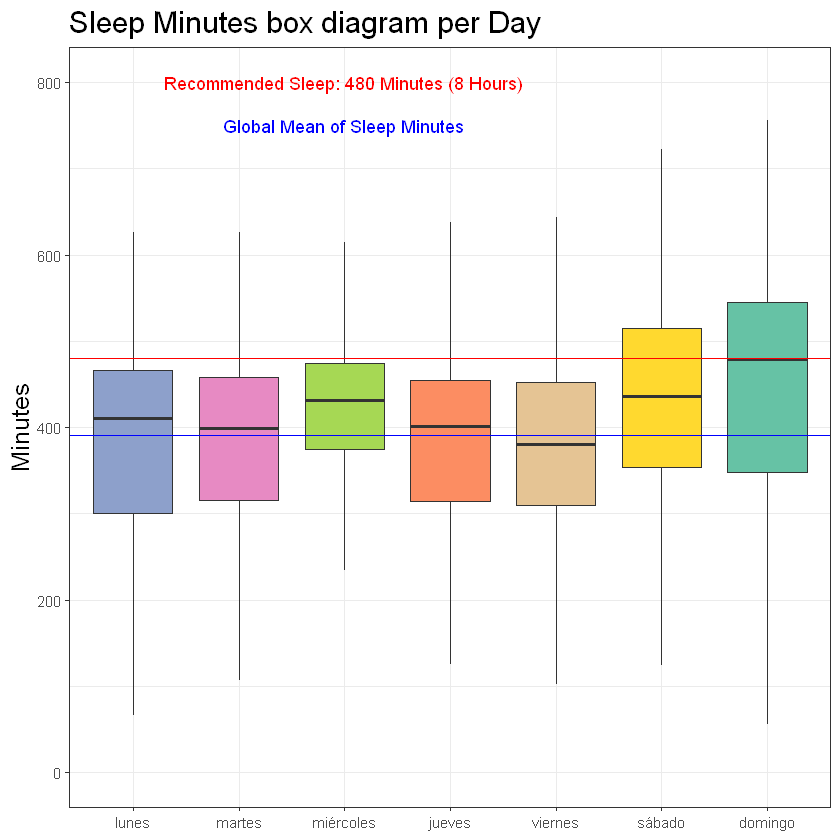

In [61]:
suppressMessages({

a1=list2[[11]]%>%
group_by(Id,Date)%>%
summarise(TotalMinutesAsleep=sum(Value==1),TotalTimeInBed=n())%>%
mutate(TotalMinutesAwake=TotalTimeInBed-TotalMinutesAsleep)

list2[[11]]%>%
group_by(Id,Date)%>%
summarise(TotalMinutesAsleep=sum(Value==1),TotalTimeInBed=n())%>%
mutate(TotalMinutesAwake=TotalTimeInBed-TotalMinutesAsleep)%>%
mutate(Weekdays=weekdays(Date))%>%
ggplot(aes(factor(Weekdays,levels=order_days),TotalMinutesAsleep))+
geom_boxplot(aes(fill=Weekdays),outlier.shape = NA)+
geom_hline(yintercept = mean(a1$TotalMinutesAsleep),col="blue")+
labs(title="Sleep Minutes box diagram per Day",y="Minutes",x=NULL,fill=NULL)+
theme_bw()+
geom_hline(yintercept=480,col="red")+
annotate("text",x="miércoles",y=800,label="Recommended Sleep: 480 Minutes (8 Hours)",col="Red")+
annotate("text",x="miércoles",y=750,label="Global Mean of Sleep Minutes",col="Blue")+
scale_fill_brewer(palette = "Set2")+
guides(fill=FALSE)+
theme(title = element_text(size = 15))
    
    })
rm(a1)

<a id="23"></a>

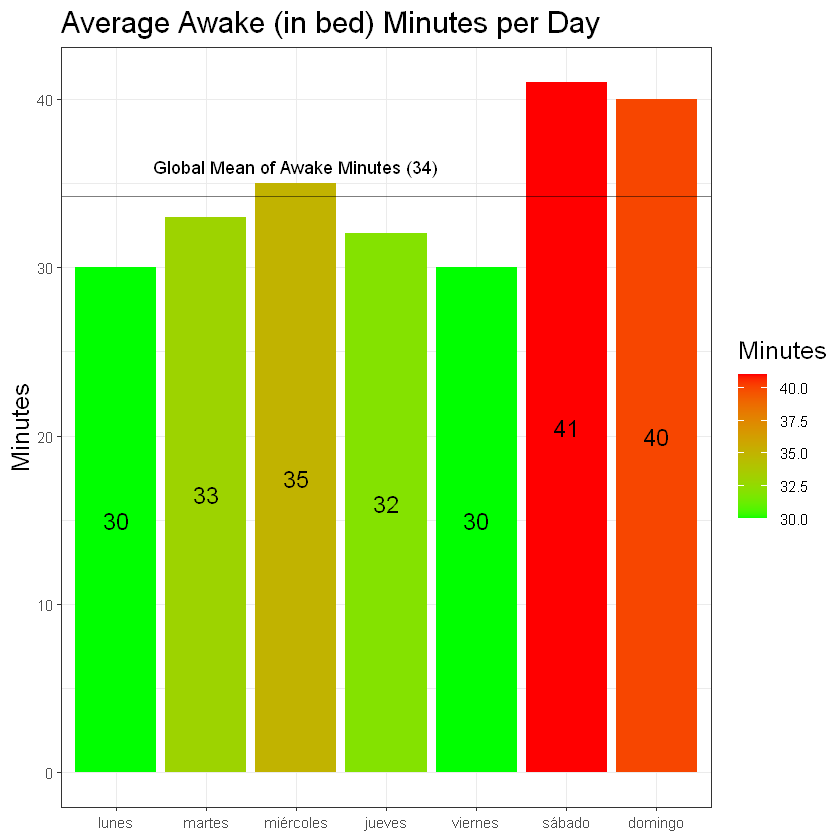

In [62]:
suppressMessages({

a1=list2[[11]]%>%
group_by(Id,Date)%>%
summarise(TotalMinutesAsleep=sum(Value==1),TotalTimeInBed=n())%>%
mutate(TotalMinutesAwake=TotalTimeInBed-TotalMinutesAsleep) 

list2[[11]]%>%
group_by(Id,Date)%>%
summarise(TotalMinutesAsleep=sum(Value==1),TotalTimeInBed=n())%>%
mutate(TotalMinutesAwake=TotalTimeInBed-TotalMinutesAsleep)%>%
mutate(Weekdays=weekdays(Date))%>%
group_by(Weekdays)%>%
summarise(TotalMinutesAwake=round(mean(TotalMinutesAwake),0))%>%
ggplot(aes(factor(Weekdays,levels=order_days),TotalMinutesAwake))+
geom_bar(stat = "identity",aes(fill=TotalMinutesAwake))+
labs(title="Average Awake (in bed) Minutes per Day",y="Minutes",x=NULL,fill="Minutes")+
geom_hline(yintercept=mean(a1$TotalMinutesAwake),alpha=0.5)+
annotate("text",x="miércoles",y=36,label="Global Mean of Awake Minutes (34)",col="black")+
theme_bw()+
scale_fill_gradient(low = "green", high = "red")+
geom_text(aes(label=TotalMinutesAwake),col="black",size=5,position = position_stack(vjust = 0.5))+
theme(title = element_text(size = 15))
    
    })
rm(a1)

<a id="24"></a>

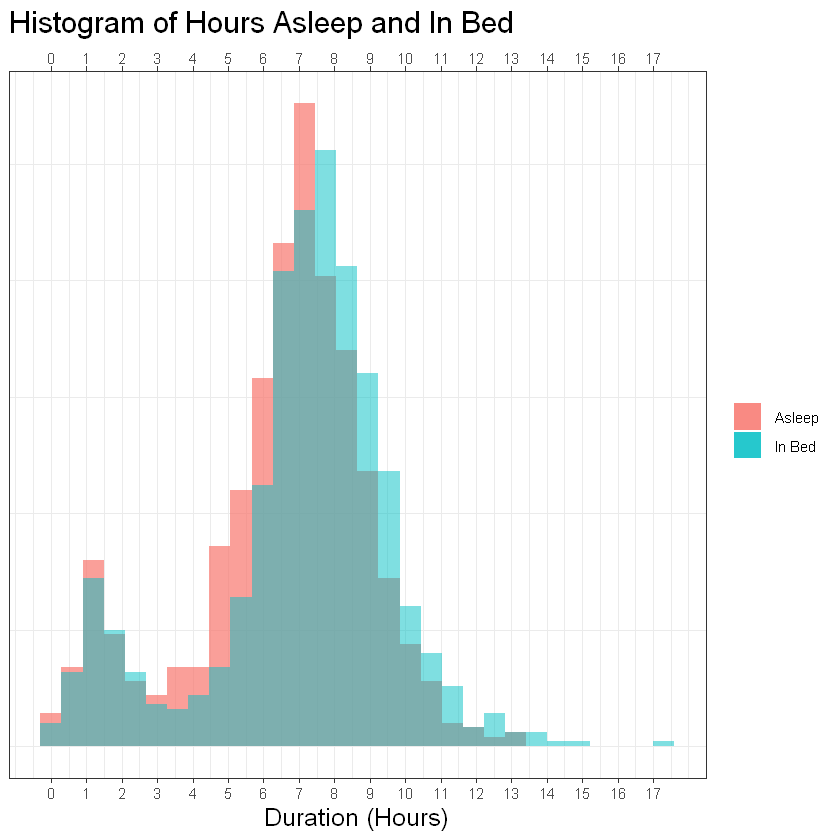

In [53]:
suppressMessages({

list2[[11]]%>%
group_by(Id,Date)%>%
summarise(TotalMinutesAsleep=sum(Value==1),TotalTimeInBed=n())%>%
mutate(TotalMinutesAwake=TotalTimeInBed-TotalMinutesAsleep)%>%
mutate(Weekdays=weekdays(Date),TotalMinutesAsleep=TotalMinutesAsleep/60,TotalTimeInBed=TotalTimeInBed/60,TotalMinutesAwake/60)%>%
ggplot()+
geom_histogram(aes(TotalMinutesAsleep,,fill="Asleep"),alpha=0.7,bins=30)+
geom_histogram(aes(TotalTimeInBed,,fill="In Bed"),alpha=0.5,bins=30)+
labs(title="Histogram of Hours Asleep and In Bed",y=NULL,x="Duration (Hours)",fill=NULL)+
theme_bw()+
guides(y=FALSE)+
scale_x_continuous(breaks=c(0:17),sec.axis = sec_axis(
      ~.,
      name = NULL,
      breaks = seq(0, 17, by = 1),
      labels = seq(0, 17, by = 1) 
    ))+
theme(title = element_text(size = 15))
    
    })

The peak around the hours '1-2' is due to few participants going to bed between 22-23 hours on one day and waking up the next day, and as the time count is by day, this inconvenience occurs.

<a id="25"></a>

Warning message:
"Removed 10 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


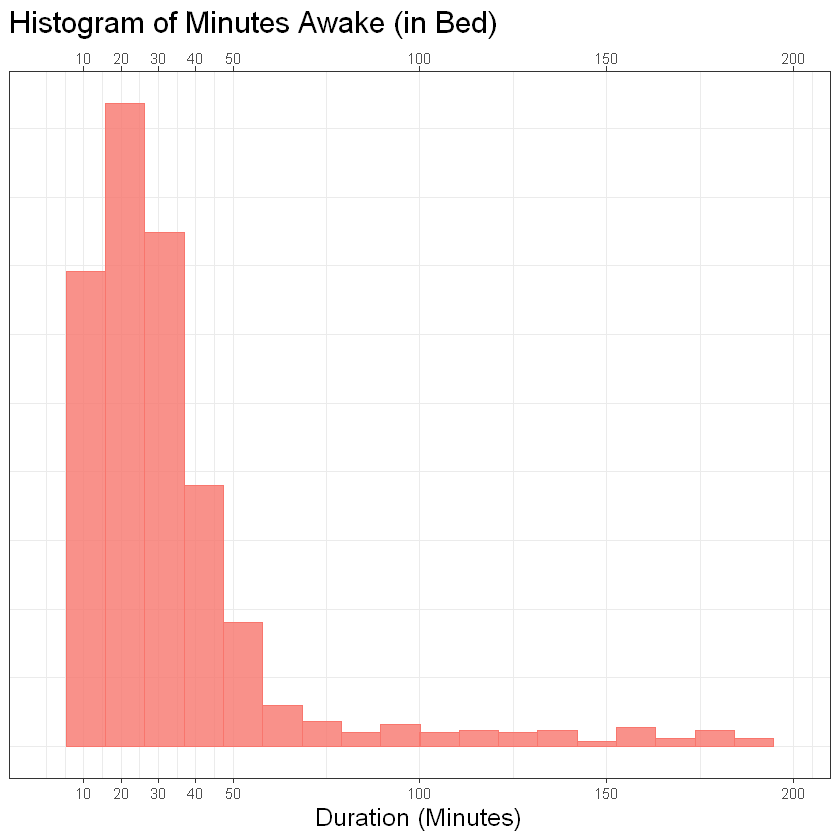

In [54]:
suppressMessages({
    
      list2[[11]]%>%
group_by(Id,Date)%>%
summarise(TotalMinutesAsleep=sum(Value==1),TotalTimeInBed=n())%>%
mutate(TotalMinutesAwake=TotalTimeInBed-TotalMinutesAsleep)%>%
mutate(Weekdays=weekdays(Date),TotalMinutesAsleep=TotalMinutesAsleep/60,TotalTimeInBed=TotalTimeInBed/60,TotalMinutesAwake/60)%>%
ggplot(aes(TotalMinutesAwake,))+
geom_histogram(aes(fill="Minutes Awake (in Bed)",col="red"),alpha=0.8,bins=20)+
labs(title="Histogram of Minutes Awake (in Bed)",y=NULL,x="Duration (Minutes)",fill=NULL)+
theme_bw()+
guides(y=FALSE,col=F,fill=F)+
scale_x_continuous(limits = c(0, 200),breaks=c(10,20,30,40,50,100,150,200),sec.axis = sec_axis(
      ~.,
      name = NULL,
      breaks = c(10,20,30,40,50,100,150,200),
      labels = c(10,20,30,40,50,100,150,200)
    ))+
theme(title = element_text(size = 15))

})

#### Down here we can see how ALL the variables are related
A large negative value close to -1 indicates a strong negative correlation, meaning there is a significant inverse relationship between the variables. Conversely, a large positive value close to 1 indicates a strong positive correlation, meaning a proportional relationship between the variables.

<a id="26"></a>

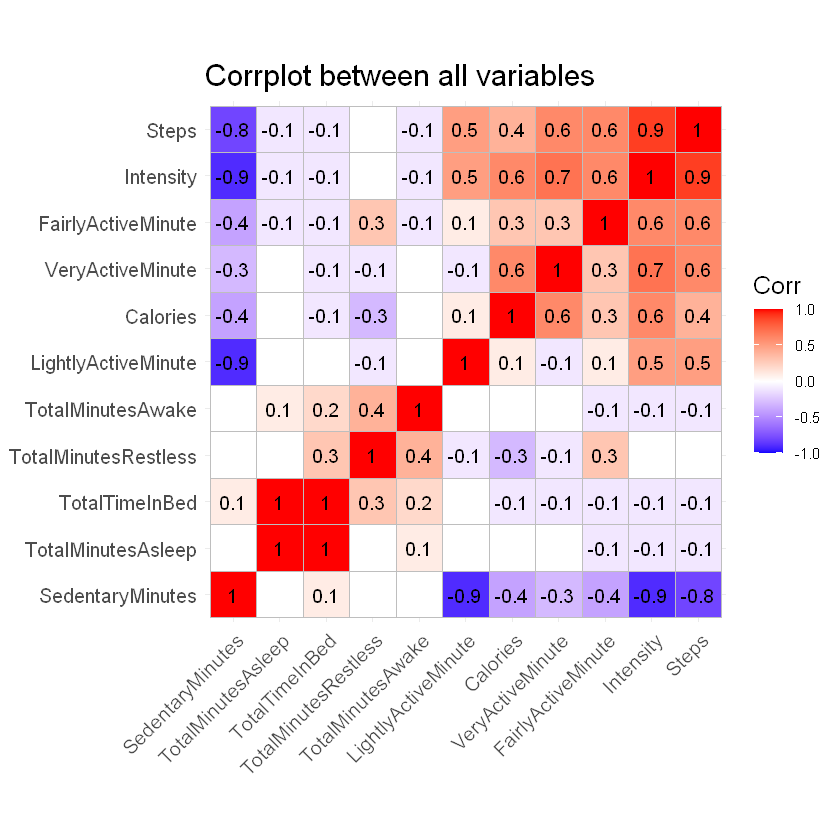

In [55]:
suppressMessages({

a2=merge(list2[[6]],list2[[8]], by.x = c("Id","Date","Time"), by.y =c("Id","Date","Time"))   

a2=merge(a2,list2[[12]], by.x = c("Id","Date","Time"), by.y =c("Id","Date","Time"))

a2=a2%>%
mutate(Hour=hour(Time))%>%
group_by(Id,Date,Hour)%>%
summarise(Calories=sum(Calories),Intensity=round(sum(Intensity)/60,1),Steps=sum(Steps))

a2=a2%>%
group_by(Id,Date)%>%
summarise(Calories=round(sum(Calories),0),Intensity=round(sum(Intensity)/24,2),Steps=sum(Steps))
              
a1=list2[[11]]%>%
group_by(Id,Date)%>%
summarise(TotalMinutesAsleep=sum(Value==1),TotalMinutesRestless=sum(Value==2),TotalMinutesAwake=sum(Value==3),TotalTimeInBed=n())
              
a3=list2[[8]]%>%
group_by(Id,Date,Intensity)%>%
summarise(count=n())

a3=a3%>%
pivot_wider(names_from=Intensity,values_from=count)
a3[is.na(a3)]=0     #we set NA values to "0"
a3=a3%>%mutate(Total=`0`+`1`+`2`+`3`)
a3=a3%>%rename(SedentaryMinutes=`0`,LightlyActiveMinute=`1`,FairlyActiveMinute=`2`,VeryActiveMinute=`3`)
a3=a3%>%filter(Total==1440)
              
a1=merge(a2,a1,by.x = c("Id","Date"), by.y =c("Id","Date"))

a1=merge(a1,a3,by.x = c("Id","Date"), by.y =c("Id","Date"))

a1=a1%>%select(-14)
              

b1=round(cor(a1[,c(3:13)]),1)

p.mat=cor_pmat(a1[,c(3:13)])

ggcorrplot(b1,lab=T,hc.order = T,p.mat = p.mat,insig = "blank")+ggtitle("Corrplot between all variables")+
theme(title = element_text(size = 15))
    
    })

* We can observe a strong correlation among the variables Calories, VeryActiveMinutes, FairlyActiveMinutes, Intensity, and Steps. This is somewhat logical, as higher exercise intensity and longer durations result in more calories burned and more steps taken.

* There is also an inverse correlation with SedentaryMinutes and the aforementioned variables, meaning that the more time spent in a sedentary state, the lower the physical activity.

* Within this dataset, it was not possible to find a relationship between sleep duration and activity level. However, this does not necessarily mean there isn't one; with a different dataset, results might vary.


<a id="27"></a>

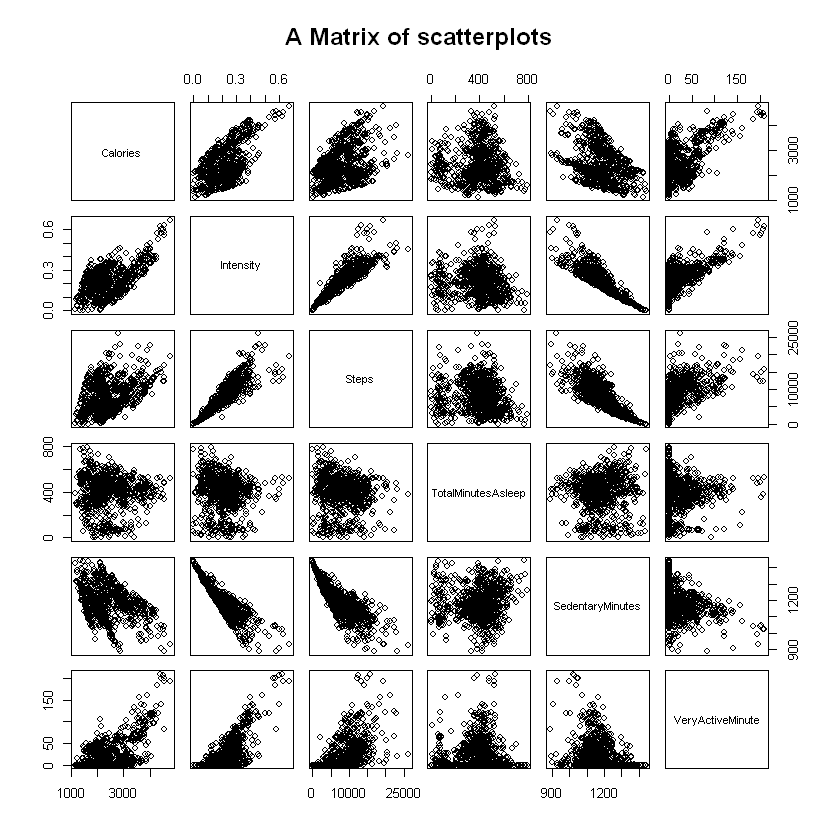

In [56]:
pairs(a1[c(3:6,10,13)],main="A Matrix of scatterplots")
rm(a1,a2,a3,b1,p.mat)

# Conclusions

* We can see that we have a dataset where 34% are sedentary users, 23% are very active, another 23% are fairly active, and 20% are lightly active, based on daily steps. [View Plot](#1)

* It can be understood from these graphs that the highest activity occurs in the afternoon, with peak activity observed between 18:00 and 19:00. It is evident that this period is post-work, and participants tend to engage in physical activities during this time. [Plot 1](#2) / [Plot 2](#3) / [Plot 3](#4)
* It can be observed from these graphs that the highest activity during the week mainly occurs on Saturdays, along with Tuesdays as well.  
[Plot 1](#5) / [Plot 2](#6) / [Plot 3](#7) / [Plot 4](#8) / [Plot 5](#12)
* The difference between weekends and weekdays is that the peaks of activity differ in timing, with peaks at 14:00 for weekends and 18:00 for weekdays. [View Plot](#11)
* It can be seen that 85% of the day is spent in a sedentary state, while the remaining 15% is spent engaging in some form of activity.  [View Plot](#13)   
It can also be observed that there is approximately a 10% variation in the daily time between a sedentary person and an active person, where one does not engage in any activity, and the other does. [View Plot](#14)
* We can observe that there is a strong correlation between Heart Rate (BPM), Calories, Steps, and Intensity. [Corrplot](#9) / [Scatterplots](#10)
* According to the data, it can be observed that the most common bedtime for Bellabeat users is at 22:00. [View Plot](#15)  
Also, the most common waking time for participants is at 6:00. [View Plot](#16)  
Additionally, it can be observed that for weekends, the bedtime and waking times tend to be slightly later. [Plot 1](#17) / [Plot 2](#18)

* We see that of the time in bed, 92% is spent sleeping and 8% awake. [View Plot](#19)  
It is also evident that clear conclusions cannot be drawn regarding the relationship between sleep patterns and the activity level during the day. [View Plot](#20)

* The maximum sleep depth in Bellabeat participants occurs in the late evening, while those users who tend to sleep outside this time frame often have lower sleep depth and tend to sleep less soundly and more restlessly. [View Plot](#21)
* Regarding the overall average sleep time, it appears to be below the recommended average (8 hours), and Wednesdays, Saturdays, and Sundays are the days when participants sleep the most. [View Plot](#22)  
It can also be observed that on these same days, participants spent more time awake in bed. [View Plot](#23)
* We see that the most frequent sleep duration is approximately 7 hours. [View Plot](#24)  
While the most frequent duration of time awake in bed is around 20 minutes. [View Plot](#25)

* Within this dataset, it is not possible to find a correlation between sleep duration (TotalMinutesAsleep) and the activity performed (SedentaryMinutes). [Plot 1](#26) / [Plot 2](#27)


# Recommendations

* In relation to the average daily steps taken by participants, it could be said that they are below the recommended average (8000 steps). Therefore, it could be recommended to users through notifications to achieve this number, also mentioning the consequences of reaching it, such as a reduction in mortality.

* Considering that users tend to sleep less than the recommended amount, and knowing the most common times when people go to bed and wake up, the Bellabeat application could determine when users should go to sleep and advise them through notifications. It could provide tips on how to improve sleep, such as listening to relaxing music or using sleep techniques.

* Knowing the most common hours when people exercise, Bellabeat could send notifications to remind users of their workouts/activities.

* Lastly, Bellabeat could develop a rewards system where users earn points for calories consumed per day/week or daily steps taken. Through this, users could claim rewards with these points, motivating them to stay committed to a healthy lifestyle.

## Additional data that could be added
Additional information such as gender, age, geographic area, location, daily temperature, and also the user's service duration (longevity as a Bellabeat member) could be added.